In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def str_to_float(col):
    try:
        return float(col)
    except ValueError:
        return col

In [4]:
def clean_data(dfs, tab, attrib):
    df = dfs[tab]
    
    # Eliminar primeras filas
    df_tab = df.iloc[4:]
    # Asignar nombres a columnas
    df_tab.columns = attrib

    # Limpiar dataset, eliminar filas 'AVG.'
    delete = 'AVG.'
    df_tab = df_tab[df_tab['Week'].astype(str).str.contains(delete) == False]

    # Limpiar dataset, eliminar filas NaN
    df_tab = df_tab.dropna(subset=['Week'])
    df_tab = df_tab.reset_index(drop=True)
    
    # Convertir la columna 'Week' al formato de fecha
    #df_tab['Inicio'] = pd.to_datetime(df_tab['Week'].str.split(' - ', expand=True)[0], format='%m/%d/%y')
    df_tab['Start_interval'] = pd.to_datetime(df_tab['Week'].str.extract(r'(\d{1,2}/\d{1,2}/\d{2})')[0], format='%m/%d/%y')

    # Obtener el número de semana del año
    df_tab['Year'] = df_tab['Start_interval'].dt.year
    df_tab['Month'] = df_tab['Start_interval'].dt.month
    df_tab['Week year'] = df_tab['Start_interval'].dt.isocalendar().week
    
    # Convertir atributos a float, excepto Week
    attrib.remove('Week')
    df_tab[attrib] = df_tab[attrib].apply(lambda col: pd.to_numeric(col.apply(str_to_float), errors='coerce'))
    
    # Retornar df resultante
    return df_tab


In [5]:
excel_data = pd.read_excel('DMN Report 29.xlsx', sheet_name=None)

tabs = ['1996', '1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
        '2010 - 2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

#print("   (Instancias, Atributos): ", df.shape)
#df

# Diccionario para almacenar dfs
dfs = {}

for tab_name, tab_data in excel_data.items():
    dfs[tab_name] = tab_data


#for sheet_name, df in dfs.items():
#    print(f"Sheet: {sheet_name}")
#    print(df)
#    print("\n")


In [6]:
attri_2023 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2023 = clean_data(dfs, '2023', attri_2023)
df_2023

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Start_interval,Year,Month,Week year
0,1/2/23 - 1/6/23,0.4775,0.41000,0.43500,0.42750,0.4371,0.4088,1.4326,1.7275,1.40000,1.3800,1.350,2.4625,2.1151,2023-01-02,2023,1,1
1,1/9/23 - 1/13/23,0.4725,0.40250,0.43500,0.42625,0.4430,0.3575,1.4074,1.6775,1.36000,1.3025,1.335,2.4936,2.1145,2023-01-09,2023,1,2
2,1/16/23 - 1/20/23,0.4675,0.37250,0.41500,0.42500,0.4453,0.3300,1.3974,1.6775,1.33000,1.2850,1.300,2.4732,2.1274,2023-01-16,2023,1,3
3,1/23/23 - 1/27/23,0.4450,0.36000,0.40500,0.41125,0.4259,0.3245,1.3981,1.6250,1.28000,1.2300,1.250,2.4773,2.1269,2023-01-23,2023,1,4
4,1/30/23 - 2/3/23,0.4400,0.36000,0.38500,0.39500,0.4001,0.3620,1.2786,1.5750,1.21500,1.2200,1.225,2.4085,2.0891,2023-01-30,2023,1,5
5,2/6/23 - 2/10/23,0.4100,0.37250,0.38000,0.38250,0.4137,0.4250,1.3102,1.5000,1.22000,1.2200,1.210,2.3817,2.0623,2023-02-06,2023,2,6
6,2/13/23 - 2/17/23,0.4050,0.38250,0.40250,0.39500,0.3988,0.4390,1.2415,1.4725,1.26500,1.2225,1.190,2.4101,2.0042,2023-02-13,2023,2,7
7,2/20/23 - 2/24/23,0.4050,0.40500,0.41875,0.38875,0.3985,0.4594,1.2480,1.4550,1.25125,1.2250,1.180,2.4369,1.9531,2023-02-20,2023,2,8
8,2/27/23 - 3/3/23,0.3900,0.41500,0.43000,0.41625,0.4028,0.4500,1.2297,1.4000,1.24500,1.2200,1.160,2.4364,1.9285,2023-02-27,2023,2,9
9,3/6/23 - 3/10/23,0.3725,0.42000,0.43000,0.42625,0.4086,0.4410,1.2016,1.3900,1.22500,1.2100,1.155,2.4419,1.9424,2023-03-06,2023,3,10


In [7]:
attri_2022 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2022 = clean_data(dfs, '2022', attri_2022)
df_2022

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Start_interval,Year,Month,Week year
0,1/3/22-1/7/22,0.4050,0.69500,0.72625,0.676250,0.6564,0.7535,1.5856,1.38500,1.64000,1.6450,1.44500,2.1612,1.9168,2022-01-03,2022,1,1
1,1/10/22-1/14/22,0.4050,0.71500,0.73625,0.696250,0.6723,0.7645,1.6078,1.41000,1.66000,1.7025,1.48250,2.3053,1.9263,2022-01-10,2022,1,2
2,1/17/22-1/21/22,0.4050,0.73500,0.74750,0.715000,0.7015,0.7900,1.6319,1.44500,1.72000,1.7700,1.51500,2.5640,1.9755,2022-01-17,2022,1,3
3,1/24/22-1/28/22,0.4050,0.74500,0.76500,0.735000,0.7225,0.8220,1.6655,1.49250,1.80000,1.7850,1.52500,2.7248,2.0152,2022-01-24,2022,1,4
4,1/31/22-2/4/22,0.4050,0.77500,0.79000,0.751250,0.7380,0.8550,1.6813,1.53875,1.80000,1.8100,1.57000,2.7941,1.9983,2022-01-31,2022,1,5
5,2/7/22-2/11/22,0.4050,0.79250,0.81000,0.776250,0.7504,0.8330,1.6944,1.55250,1.85000,1.8700,1.60000,2.6661,1.9351,2022-02-07,2022,2,6
6,2/14/22-2/18/22,0.4050,0.80125,0.80000,0.802500,0.7787,0.8170,1.7225,1.61000,1.86500,1.8950,1.72000,2.6028,1.8786,2022-02-14,2022,2,7
7,2/21/22-2/25/22,0.4050,0.80500,0.79250,0.811250,0.7942,0.7950,1.7416,1.64000,1.87500,1.9175,1.73000,2.6893,1.8845,2022-02-21,2022,2,8
8,2/28/22-3/4/22,0.4050,0.78250,0.78250,0.800000,0.7950,0.7530,1.7673,1.69000,1.87500,1.9150,1.73000,2.7075,1.9397,2022-02-28,2022,2,9
9,3/7/22-3/11/22,0.4050,0.78250,0.77000,0.800000,0.8014,0.7575,1.7817,1.70000,1.84000,1.9100,1.73500,2.6887,1.9841,2022-03-07,2022,3,10


In [8]:
attri_2021 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2021 = clean_data(dfs, '2021', attri_2021)
df_2021

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Start_interval,Year,Month,Week year
0,1/4/21 - 1/8/21,0.4050,0.45125,0.46000,0.44000,0.4385,0.4860,1.1091,0.94000,1.14500,1.15250,1.0350,1.5281,1.6639,2021-01-04,2021,1,1
1,1/11/21 - 1/15/21,0.4050,0.48500,0.48000,0.44250,0.4404,0.5100,1.1239,0.96500,1.16000,1.16250,1.0500,1.4895,1.6677,2021-01-11,2021,1,2
2,1/18/21 - 1/22/21,0.4050,0.49000,0.48750,0.49500,0.4577,0.5375,1.1337,0.98250,1.18750,1.19500,1.0800,1.4633,1.6992,2021-01-18,2021,1,3
3,1/25/21 - 1/29/21,0.4200,0.49500,0.50000,0.50000,0.4726,0.5225,1.1507,0.99250,1.16500,1.16500,1.0750,1.4149,1.7853,2021-01-25,2021,1,4
4,2/1/21 - 2/5/21,0.4125,0.50250,0.50750,0.50250,0.4817,0.5350,1.1445,1.00000,1.16500,1.15750,1.0750,1.4278,1.7845,2021-02-01,2021,2,5
5,2/8/21 - 2/12/21,0.4125,0.50750,0.51500,0.52125,0.4955,0.5400,1.1494,1.01000,1.14000,1.14000,1.0750,1.3460,1.7514,2021-02-08,2021,2,6
6,2/15/21 - 2/19/21,0.4125,0.52000,0.51500,0.50875,0.5033,0.5475,1.1281,1.02000,1.13500,1.13000,1.0800,1.3335,1.6782,2021-02-15,2021,2,7
7,2/22/21 - 2/26/21,0.4200,0.52250,0.54125,0.53000,0.5098,0.5490,1.1192,1.02500,1.11500,1.11500,1.0850,1.3609,1.6653,2021-02-22,2021,2,8
8,3/1/21 - 3/5/21,0.4200,0.56250,0.54750,0.53125,0.5168,0.5695,1.0870,1.02500,1.12750,1.14250,1.0850,1.4011,1.6186,2021-03-01,2021,3,9
9,3/8/21 - 3/12/21,0.4250,0.56500,0.56250,0.56000,0.5300,0.5935,1.1034,1.03000,1.15750,1.15000,1.0900,1.5087,1.6130,2021-03-08,2021,3,10


In [9]:
attri_2020 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks']

df_2020 = clean_data(dfs, '2020', attri_2020)
df_2020

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Start_interval,Year,Month,Week year
0,1/1/19 - 1/3/2020,0.2900,0.34000,0.34875,0.34500,0.3341,0.3113,1.2359,0.99250,1.2350,1.24500,1.10500,1.9628,1.9027,2019-01-01,2019,1,1
1,1/6/2020 - 1/10/2020,0.2975,0.34000,0.34875,0.34375,0.3333,0.3295,1.2355,0.99250,1.2500,1.24500,1.11750,1.9815,1.8879,2020-01-06,2020,1,2
2,1/13/2020 - 1/17/2020,0.2975,0.34500,0.35125,0.34375,0.3260,0.3615,1.2334,1.00375,1.2550,1.25500,1.12500,1.9259,1.8765,2020-01-13,2020,1,3
3,1/20/2020 - 1/24/2020,0.3000,0.35375,0.35625,0.34625,0.3342,0.3613,1.2427,1.00625,1.2700,1.27000,1.00625,1.9549,1.8887,2020-01-20,2020,1,4
4,1/27/2020 - 1/31/2020,0.3000,0.35375,0.35625,0.34625,0.3409,0.3730,1.2474,1.00875,1.2700,1.27000,1.15000,1.9009,1.8995,2020-01-27,2020,1,5
5,2/3/2020 - 2/7/2020,0.3025,0.35500,0.36500,0.35125,0.3528,0.3730,1.2578,1.01125,1.2500,1.26000,1.11500,1.8675,1.9450,2020-02-03,2020,2,6
6,2/10/2020 - 2/14/2020,0.3050,0.36000,0.37875,0.36000,0.3634,0.3895,1.2542,1.01500,1.2250,1.25500,1.15500,1.8561,1.9639,2020-02-10,2020,2,7
7,2/17/2020 - 2/21/2020,0.3050,0.36375,0.37500,0.35750,0.3654,0.3654,1.2540,1.01500,1.2100,1.22000,1.16000,1.8257,1.9711,2020-02-17,2020,2,8
8,2/24/2020 - 2/28/2020,0.3050,0.35875,0.37000,0.36500,0.3694,0.3505,1.2411,1.01500,1.1750,1.18500,1.16000,1.7921,1.9412,2020-02-24,2020,2,9
9,3/2/2020 - 3/6/2020,0.3100,0.35875,0.37000,0.37000,0.3743,0.3385,1.2236,1.01500,1.1450,1.18000,1.15000,1.7762,1.9049,2020-03-02,2020,3,10


In [10]:
attri_2019 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
           'NDPSR NFDM', '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
           'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2019 = clean_data(dfs, '2019', attri_2019)
df_2019

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/19 - 1/6/19,0.3600,0.45500,0.44500,0.48250,0.4728,0.4875,0.8850,0.92500,0.92500,0.90000,2.2523,1.3937,1.3045,NaN,2019-01-01,2019,1,1
1,1/7/19 - 1/1/19,0.3700,0.47000,0.46250,0.48875,0.4843,0.4870,NaN,0.88625,0.97000,0.95750,0.9300,2.2168,1.4212,1.3263,2019-01-07,2019,1,2
2,1/14/19 - 1/18/19,0.3700,0.47000,0.47500,0.49750,0.4769,0.5130,NaN,0.89625,0.99375,0.99750,0.9300,2.2496,1.4268,1.3279,2019-01-14,2019,1,3
3,1/21/19 - 1/25/19,0.3700,0.47000,0.47500,0.49375,0.4833,0.4263,NaN,0.89625,1.00000,1.00750,0.9300,2.2402,1.4346,1.3170,2019-01-21,2019,1,4
4,1/28/19 - 2/1/19,0.3700,0.46875,0.47250,0.49500,0.4798,0.3885,0.9713,0.89875,1.00000,1.00750,0.9450,2.2696,1.4323,1.2886,2019-01-28,2019,1,5
5,2/4/19 - 2/8/19,0.3600,0.45625,0.46250,0.46500,0.4694,0.3725,0.9766,0.89875,0.99500,1.00000,0.9600,2.2320,1.4311,1.2502,2019-02-04,2019,2,6
6,2/11/19 - 2/15/19,0.3650,0.44000,0.43500,0.46125,0.4682,0.3455,0.9811,0.89875,0.98000,0.99750,0.9600,2.2855,1.4337,1.2639,2019-02-11,2019,2,7
7,2/18/19 - 2/22/19,0.3650,0.43000,0.43500,0.43625,0.4537,0.3538,0.9923,0.89880,0.99500,0.99500,0.9600,2.2977,1.4662,1.2969,2019-02-18,2019,2,8
8,2/25/19 - 3/1/19,0.3650,0.43000,0.41750,0.42000,0.4246,0.3510,0.9830,0.90250,0.98500,0.99500,0.9600,2.2639,1.5167,1.3671,2019-02-25,2019,2,9
9,3/4/19 - 3/8/19,0.3650,0.43000,0.41750,0.41000,0.4216,0.3485,0.9822,0.90250,0.97500,0.99500,0.9600,2.2612,1.5656,1.4178,2019-03-04,2019,3,10


In [11]:
attri_2018 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg', 'CME whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2018 = clean_data(dfs, '2018', attri_2018)
df_2018

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/18 - 1/7/18,0.22000,0.26500,0.27000,0.29500,0.3008,NaN,0.73750,0.70000,0.71000,0.7375,2.1969,1.5156,1.4356,2018-01-01,2018,1,1
1,1/8/18 - 1/14/18,0.22000,0.25750,0.26500,0.29250,0.2851,NaN,0.73125,0.69000,0.70750,0.8000,2.2238,1.5056,1.4038,2018-01-08,2018,1,2
2,1/15/18 - 1/21/18,0.21250,0.24875,0.26250,0.28750,0.2773,NaN,0.72750,0.68500,0.70000,0.7500,2.1705,1.4555,1.2855,2018-01-15,2018,1,3
3,1/22/18 - 1/28/18,0.21250,0.24250,0.26000,0.28500,0.2797,NaN,0.72500,0.69500,0.68500,0.7500,2.1406,1.5263,1.3231,2018-01-22,2018,1,4
4,1/29/18 - 2/4/18,0.21250,0.24250,0.26000,0.28125,0.2691,NaN,0.72500,0.70500,0.71250,0.7650,2.1215,1.5145,1.3460,2018-01-29,2018,1,5
5,2/5/18 - 2/11/18,0.21750,0.24000,0.24000,0.28125,0.2717,NaN,0.72500,0.70500,0.70750,0.7225,2.1305,1.4635,1.3215,2018-02-05,2018,2,6
6,2/12/18 - 2/18/18,0.21750,0.24000,0.24000,0.28000,0.2524,NaN,0.72500,0.72500,0.72500,0.7250,2.0675,1.5170,1.3590,2018-02-12,2018,2,7
7,2/19/18 - 2/25/18,0.21750,0.24000,0.24000,0.28000,0.2528,NaN,0.72500,0.72500,0.72500,0.7300,2.0955,1.5175,1.4025,2018-02-19,2018,2,8
8,2/26/18 - 3/4/18,0.21750,0.23500,0.24000,0.27250,0.2504,NaN,0.72500,0.72500,0.73000,0.7300,2.1656,1.5288,1.4794,2018-02-26,2018,2,9
9,3/5/18 - 3/11/18,0.20750,0.23500,0.25000,0.27125,0.2549,NaN,0.70000,0.72000,0.73000,0.7350,2.1930,1.5350,1.4715,2018-03-05,2018,3,10


In [12]:
attri_2017 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2017 = clean_data(dfs, '2017', attri_2017)
df_2017

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/2/17 - 1/8/17,0.3700,0.39000,0.41500,0.42500,0.4061,0.88250,1.0150,1.0000,0.96000,2.2981,1.6631,1.5619,2017-01-02,2017,1,1
1,1/9/17 - 1/15/17,0.3700,0.41000,0.44750,0.42500,0.4140,0.91625,1.0250,1.0000,0.98000,2.2400,1.6644,1.5900,2017-01-09,2017,1,2
2,1/16/17 - 1/22/17,0.3700,0.41625,0.45500,0.42875,0.4272,0.91625,1.0450,1.0300,0.97000,2.2695,1.7200,1.6250,2017-01-16,2017,1,3
3,1/23/17 - 1/29/17,0.3700,0.42500,0.45875,0.46375,0.4371,0.94000,1.0450,1.0500,0.97000,2.2450,1.7038,1.5869,2017-01-23,2017,1,4
4,1/30/17 - 2/5/17,0.3750,0.43000,0.46875,0.46875,0.4454,0.94000,1.0250,1.0450,0.97000,2.2075,1.6525,1.4670,2017-01-30,2017,1,5
5,2/6/17 - 2/12/17,0.3750,0.44500,0.48375,0.49750,0.4593,0.96500,1.0050,1.0450,0.96500,2.2075,1.7475,1.5920,2017-02-06,2017,2,6
6,2/13/17 - 2/19/17,0.3750,0.46125,0.49500,0.48750,0.4685,0.99625,0.9950,1.0150,0.97750,2.1550,1.6360,1.6790,2017-02-13,2017,2,7
7,2/20/17 - 2/26/17,0.3750,0.47375,0.49500,0.48750,0.4822,0.99750,0.9750,0.9850,0.97750,2.1410,1.5985,1.6440,2017-02-20,2017,2,8
8,2/27/17 - 3/5/17,0.3750,0.48000,0.49500,0.48750,0.4940,0.99750,0.9575,0.9625,0.97750,2.1294,1.5431,1.5569,2017-02-27,2017,2,9
9,3/6/17 - 3/12/17,0.3750,0.48500,0.50000,0.49250,0.5042,0.98250,0.9225,0.8950,0.96500,2.1795,1.5065,1.4760,2017-03-06,2017,3,10


In [13]:
attri_2016 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2016 = clean_data(dfs, '2016', attri_2016)
df_2016

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/4/16 - 1/10/16,0.19500,0.21375,0.24000,0.25000,0.2293,0.53000,0.74875,0.84500,0.84750,2.0450,1.4544,1.4875,2016-01-04,2016,1,1
1,1/11/16 - 1/17/16,0.20000,0.22000,0.24000,0.24875,0.2354,0.53000,0.74250,0.83500,0.83250,2.0370,1.4785,1.5030,2016-01-11,2016,1,2
2,1/18/16 - 1/24/16,0.20500,0.22500,0.24000,0.25375,0.2339,0.53500,0.74125,0.83000,0.82625,2.1145,1.4870,1.5245,2016-01-18,2016,1,3
3,1/25/16 - 1/31/16,0.21000,0.22250,0.24000,0.26375,0.2351,0.55500,0.74125,0.81500,0.82000,2.1438,1.4775,1.4781,2016-01-25,2016,1,4
4,2/1/16 - 2/7/16,0.21000,0.23250,0.25000,0.26375,0.2352,0.56000,0.73500,0.81500,0.82000,2.1950,1.4600,1.4300,2016-02-01,2016,2,5
5,2/8/16 - 2/14/16,0.21250,0.23500,0.25000,0.28750,0.2381,0.57000,0.72750,0.80000,0.81500,2.1455,1.4660,1.4560,2016-02-08,2016,2,6
6,2/15/16 - 2/21/16,0.21500,0.24000,0.25000,0.25000,0.2479,0.57000,0.72750,0.78500,0.79750,2.1310,1.4820,1.4710,2016-02-15,2016,2,7
7,2/22/16 - 2/28/16,0.21500,0.24250,0.25000,0.26375,0.2375,0.58000,0.72750,0.79000,0.80000,2.0506,1.4894,1.4706,2016-02-22,2016,2,8
8,2/29/16 - 3/6/16,0.22250,0.24125,0.25000,0.26500,0.2455,0.58000,0.73125,0.77000,0.78000,2.0260,1.4620,1.4345,2016-02-29,2016,2,9
9,3/7/16 - 3/13/16,0.22250,0.24000,0.25000,0.26500,0.2589,0.58000,0.75000,0.78500,0.78500,1.9925,1.4760,1.4430,2016-03-07,2016,3,10


In [14]:
attri_2015 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2015 = clean_data(dfs, '2015', attri_2015)
df_2015

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/15 - 1/4,0.38000,0.56250,0.4900,0.58000,0.5943,1.21500,1.08500,1.11250,1.01375,1.5950,1.5619,1.4975,2015-01-01,2015,1,1
1,1/5/15-1/11,0.38000,0.56000,0.4900,0.57500,0.5866,1.21500,1.08500,1.11000,0.98750,1.5550,1.5344,1.4794,2015-01-05,2015,1,2
2,1/12/15-1/18,0.33000,0.54000,0.4800,0.57000,0.5941,1.19750,1.04500,1.08500,0.86875,1.5400,1.5760,1.5430,2015-01-12,2015,1,3
3,1/19/15-1/25,0.32000,0.53500,0.4800,0.57000,0.5885,1.18875,1.01000,1.04250,0.85375,1.5450,1.5180,1.5085,2015-01-19,2015,1,4
4,1/26/15-2/1,0.31000,0.52500,0.4600,0.54375,0.5924,1.15500,0.96500,1.00625,0.87500,1.5500,1.4750,1.4475,2015-01-26,2015,1,5
5,2/2/15-2/8,0.31000,0.51500,0.4600,0.54375,0.5852,1.13750,0.95500,0.98875,0.82250,1.6495,1.4990,1.4805,2015-02-02,2015,2,6
6,2/9/15-2/15,0.31000,0.51000,0.4550,0.52250,0.5779,1.12250,0.98750,1.01250,0.86000,1.8075,1.5350,1.4875,2015-02-09,2015,2,7
7,2/16/15-2/22,0.29000,0.48000,0.4500,0.51875,0.5599,1.10750,1.02500,1.05125,0.86000,1.7260,1.5320,1.4815,2015-02-16,2015,2,8
8,2/23/15-3/1,0.27750,0.46500,0.4500,0.51000,0.5270,1.08750,1.08500,1.10000,0.87000,1.7213,1.5413,1.4850,2015-02-23,2015,2,9
9,3/2/15-3/8,0.26875,0.45500,0.4500,0.50375,0.5106,1.06875,1.10000,1.14125,0.95500,1.6610,1.5450,1.4855,2015-03-02,2015,3,10


In [15]:
attri_2014 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2014 = clean_data(dfs, '2014', attri_2014)
df_2014

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/14 - 1/5,0.63500,0.56000,0.58875,0.60125,0.5761,1.72000,2.03000,2.06500,1.87000,1.5800,2.0000,1.9675,2014-01-01,2014,1,1
1,1/6/14 - 1/12,0.63500,0.56250,0.58875,0.60125,0.5716,1.72000,2.04000,2.06500,1.87500,1.5413,2.0144,1.8825,2014-01-06,2014,1,2
2,1/13/14 - 1/19,0.58000,0.56750,0.60375,0.60250,0.5975,1.76500,2.06500,2.07000,1.90250,1.6480,2.1520,2.0980,2014-01-13,2014,1,3
3,1/20/14 - 1/26,0.59500,0.57750,0.60625,0.61125,0.5928,1.76500,2.07500,2.08500,1.91125,1.7740,2.2115,2.1765,2014-01-20,2014,1,4
4,1/27/14 - 2/2,0.59500,0.58000,0.60750,0.62250,0.5950,1.78500,2.07500,2.08500,1.92625,1.9000,2.2794,2.2475,2014-01-27,2014,1,5
5,2/3/14 - 2/9,0.59500,0.58500,0.61000,0.62875,0.6087,1.77250,2.07500,2.08500,1.92250,1.8935,2.3370,2.2990,2014-02-03,2014,2,6
6,2/10/14 - 2/16,0.59500,0.58750,0.61250,0.63500,0.6136,1.78500,2.07000,2.08250,1.94125,1.8660,2.3215,2.2930,2014-02-10,2014,2,7
7,2/17/14 - 2/23,0.59500,0.60750,0.61500,0.64500,0.6200,1.78500,2.07250,2.09125,1.93625,1.7640,2.1100,2.1035,2014-02-17,2014,2,8
8,2/24/14 - 3/2,0.59500,0.61125,0.62500,0.65750,0.6283,1.78250,2.07250,2.09500,1.93250,1.7763,2.1269,2.1006,2014-02-24,2014,2,9
9,3/3/14 - 3/9,0.59500,0.61125,0.62875,0.65000,0.6345,1.76750,2.07500,2.09750,1.92500,1.8070,2.2060,2.1905,2014-03-03,2014,3,10


In [16]:
attri_2013 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2013 = clean_data(dfs, '2013', attri_2013)
df_2013

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/13 - 1/6,0.7700,0.64000,0.62500,0.65000,0.6678,1.24625,1.53500,1.57250,1.59500,1.4975,1.7400,1.6825,2013-01-01,2013,1,1
1,1/7/13 - 1/13,0.7300,0.66000,0.63000,0.69875,0.6579,1.26250,1.53750,1.58500,1.53000,1.4969,1.7600,1.7225,2013-01-07,2013,1,2
2,1/14/13 - 1/20,0.7400,0.63000,0.62500,0.67375,0.6482,1.26250,1.53750,1.56500,1.59000,1.4575,1.7280,1.6855,2013-01-14,2013,1,3
3,1/21/13 - 1/27,0.7300,0.62500,0.60250,0.61125,0.6566,1.26250,1.54500,1.56500,1.51500,1.4885,1.7035,1.6595,2013-01-21,2013,1,4
4,1/28/13 - 2/3,0.7300,0.62250,0.59000,0.62250,0.6449,1.25750,1.54250,1.56500,1.47750,1.5050,1.6525,1.5863,2013-01-28,2013,1,5
5,2/4/13 - 2/10,0.7250,0.62000,0.58625,0.61750,0.6539,1.25750,1.53750,1.56500,1.46000,1.5350,1.6450,1.5415,2013-02-04,2013,2,6
6,2/11/13 - 2/17,0.7250,0.61750,0.58000,0.62625,0.6476,1.25375,1.52375,1.56000,1.44000,1.5550,1.6470,1.5480,2013-02-11,2013,2,7
7,2/18/13 - 2/24,0.7250,0.60000,0.57875,0.61875,0.6466,1.25000,1.52125,1.55500,1.43000,1.5810,1.6670,1.6080,2013-02-18,2013,2,8
8,2/25/13 - 3/3,0.7100,0.59000,0.57000,0.61750,0.6342,1.24000,1.51500,1.55000,1.41000,1.6000,1.6431,1.6300,2013-02-25,2013,2,9
9,3/4/13 - 3/10,0.7100,0.58000,0.56500,0.60750,0.6305,1.24000,1.50250,1.53000,1.40000,1.5590,1.5970,1.5780,2013-03-04,2013,3,10


In [17]:
attri_2012 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2012 = clean_data(dfs, '2012', attri_2012)
df_2012

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/2/12 - 1/8,0.7700,0.65500,0.67750,0.67375,0.6599,1.46000,1.4000,1.44500,1.35000,1.5950,1.5625,1.5700,2012-01-02,2012,1,1
1,1/9/12 -1/15,0.8400,0.69250,0.68375,0.70000,0.6710,1.51500,1.3850,1.44000,1.35000,1.6025,1.5906,1.5831,2012-01-09,2012,1,2
2,1/16/12 - 1/22,0.8600,0.70750,0.70625,0.72875,0.6791,1.52500,1.3900,1.43500,1.34000,1.6265,1.5960,1.5755,2012-01-16,2012,1,3
3,1/23/12 - 1/29,0.8600,0.71000,0.71625,0.74500,0.7020,1.52750,1.3950,1.43000,1.32500,1.5800,1.5500,1.5200,2012-01-23,2012,1,4
4,1/30/12 - 2 /5,0.8600,0.71000,0.71750,0.75500,0.7113,1.52750,1.3800,1.42500,1.32500,1.5580,1.5060,1.4870,2012-01-30,2012,1,5
5,2/6/12 - 2/12,0.8600,0.70500,0.69000,0.73500,0.6753,1.52750,1.3550,1.40750,1.31750,1.4980,1.4965,1.4925,2012-02-06,2012,2,6
6,2/13/12 - 2/19,0.8600,0.70500,0.67250,0.73250,0.6648,1.52750,1.3475,1.39250,1.31000,1.4425,1.4770,1.4890,2012-02-13,2012,2,7
7,2/20/12 - 2/26,0.8600,0.70500,0.67125,0.71625,0.6414,1.52750,1.3375,1.38000,1.30500,1.4005,1.4820,1.4780,2012-02-20,2012,2,8
8,2/27/12 - 3/4,0.8600,0.70000,0.59500,0.71500,0.6404,1.52750,1.3275,1.36500,1.30250,1.4156,1.4750,1.4738,2012-02-27,2012,2,9
9,3/5/12 - 3/11,0.8600,0.65250,0.54500,0.71125,0.6113,1.52500,1.3200,1.35500,1.30125,1.4205,1.4790,1.4845,2012-03-05,2012,3,10


In [18]:
attri_2011 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2011 = clean_data(dfs, '2011', attri_2011)
df_2011

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/3/11 - 1/9,0.3350,0.35750,0.39375,0.39125,0.3822,0.9950,1.22000,1.2700,1.1650,1.6575,1.3305,1.3350,2011-01-03,2011,1,1
1,1/10/11 - 1/16,0.3475,0.37000,0.40375,0.39125,0.3903,1.0100,1.22125,1.2725,1.1850,1.8380,1.3510,1.3405,2011-01-10,2011,1,2
2,1/17/11 - 1/23,0.3500,0.37500,0.40875,0.39750,0.3870,1.0200,1.26500,1.3050,1.2300,2.1000,1.4705,1.4320,2011-01-17,2011,1,3
3,1/24/11 - 1/30,0.3550,0.38000,0.41250,0.40750,0.3956,1.0300,1.32500,1.3800,1.3150,2.1000,1.5125,1.4856,2011-01-24,2011,1,4
4,1/31/11 - 2/6,0.3550,0.38000,0.41625,0.41000,0.3953,1.0300,1.34500,1.4100,1.3400,2.1000,1.6735,1.6445,2011-01-31,2011,1,5
5,2/7/11 - 2/13,0.3600,0.38500,0.42000,0.41000,0.3996,1.0450,1.45000,1.5200,1.3450,2.1000,1.7785,1.7410,2011-02-07,2011,2,6
6,2/14/11 - 2/20,0.3600,0.38750,0.43250,0.41250,0.4085,1.0500,1.49000,1.5450,1.3950,2.0980,1.8870,1.8485,2011-02-14,2011,2,7
7,2/21/11 - 2/27,0.3600,0.39375,0.46625,0.41500,0.4201,1.0650,1.57000,1.6000,1.4000,2.0465,1.9435,1.9065,2011-02-21,2011,2,8
8,2/28/11 - 3/6,0.3600,0.39375,0.47750,0.42000,0.4350,1.0750,1.62000,1.6000,1.5000,2.0100,1.9850,1.9463,2011-02-28,2011,2,9
9,3/7/11 - 3/13,0.3650,0.39750,0.47750,0.42000,0.4288,1.0800,1.61000,1.6300,1.5300,2.0780,2.0030,1.9655,2011-03-07,2011,3,10


In [19]:
attri_2010 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2010 = clean_data(dfs, '2010', attri_2010)
df_2010

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/4/10 - 1/10,0.35500,0.37000,0.40130,0.37250,0.3725,0.89000,1.3600,1.3975,1.33500,1.3275,1.4800,1.4306,2010-01-04,2010,1,1
1,1/11/10 - 1/17,0.36000,0.37250,0.40750,0.37500,0.3857,0.91500,1.3550,1.3975,1.32500,1.3325,1.4245,1.4350,2010-01-11,2010,1,2
2,1/18/10 - 1/24,0.36000,0.37250,0.40750,0.37250,0.3879,0.92500,1.3250,1.3750,1.31500,1.4020,1.4130,1.4450,2010-01-18,2010,1,3
3,1/25/10 - 1/31,0.35750,0.38000,0.40750,0.37750,0.3902,0.93500,1.3350,1.3750,1.31500,1.4844,1.4663,1.4913,2010-01-25,2010,1,4
4,2/1/10 - 2/7,0.35000,0.38000,0.40500,0.37750,0.3866,0.93500,1.1950,1.3200,1.22250,1.3790,1.5130,1.5070,2010-02-01,2010,2,5
5,2/8/10 - 2/14,0.35000,0.38000,0.40500,0.37750,0.3894,0.93375,1.1100,1.2600,1.21250,1.3310,1.4990,1.4740,2010-02-08,2010,2,6
6,2/15/10 - 2/21,0.35000,0.37750,0.40500,0.37750,0.3900,0.93375,1.0700,1.2200,1.19250,1.3420,1.4990,1.4650,2010-02-15,2010,2,7
7,2/22/10 - 2/28,0.35000,0.37750,0.40500,0.38000,0.3960,0.93000,1.0700,1.2050,1.11625,1.3513,1.4413,1.4013,2010-02-22,2010,2,8
8,3/1/10 - 3/7,0.35000,0.37750,0.40500,0.38750,0.3946,0.92500,1.0450,1.1350,1.07500,1.3990,1.3690,1.3290,2010-03-01,2010,3,9
9,3/8/10 - 3/14,0.35000,0.37625,0.40375,0.38625,0.3894,0.91500,1.0350,1.0900,1.05750,NaN,1.3205,1.2725,2010-03-08,2010,3,10


In [20]:
attri_2009 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2009 = clean_data(dfs, '2009', attri_2009)
df_2009

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/09 - 1/4,0.16500,0.17750,0.15250,0.19125,0.1764,0.44500,0.82250,0.87500,0.78125,1.1467,1.2808,1.3342,2009-01-01,2009,1,1
1,1/5/09 - 1/11,0.16500,0.17750,0.15250,0.19125,0.1733,0.47000,0.82250,0.87000,0.74625,1.1367,1.1942,1.2283,2009-01-05,2009,1,2
2,1/12/09 - 1/18,0.13750,0.17500,0.14750,0.19125,0.1738,0.50500,0.82000,0.85750,0.73000,1.1220,1.0720,1.0595,2009-01-12,2009,1,3
3,1/19/09 - 1/25,0.13250,0.17500,0.14750,0.19125,0.1710,0.52750,0.81000,0.85500,0.68000,1.1115,1.0640,1.0730,2009-01-19,2009,1,4
4,1/26/09 - 2/1,0.13250,0.15500,0.14750,0.19125,0.1692,0.53750,0.81000,0.85000,0.63500,1.1006,1.0700,1.0975,2009-01-26,2009,1,5
5,2/2/09 - 2/8,0.13250,0.15500,0.14750,0.19125,0.1659,0.54000,0.80000,0.83500,0.62500,1.1025,1.1245,1.1055,2009-02-02,2009,2,6
6,2/9/09 - 2/15,0.12750,0.15500,0.15000,0.19125,0.1586,0.54000,0.80000,0.83500,0.64500,1.0985,1.1535,1.1330,2009-02-09,2009,2,7
7,2/16/09 - 2/22,0.12750,0.15750,0.15250,0.18750,0.1533,0.54000,0.79500,0.83000,0.65750,1.1025,1.2065,1.1990,2009-02-16,2009,2,8
8,2/23/09 - 3/1,0.12750,0.15875,0.15750,0.17875,0.1555,0.54000,0.79500,0.83000,0.66000,1.1025,1.3063,1.2763,2009-02-23,2009,2,9
9,3/2/09 - 3/8,0.12750,0.16000,0.16125,0.17375,0.1591,0.53875,0.79500,0.83000,0.69250,1.1340,1.2200,1.2045,2009-03-02,2009,3,10


In [21]:
attri_2008 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2008 = clean_data(dfs, '2008', attri_2008)
df_2008

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/08 - 1/6,0.41000,0.43250,0.4350,0.43500,0.4464,1.23500,1.62500,1.67500,1.75500,1.2717,2.0050,1.9533,2008-01-01,2008,1,1
1,1/7/08 - 1/13,0.35000,0.43250,0.4200,0.43500,0.4431,1.23500,1.59500,1.60000,1.64500,1.2392,2.1008,2.0283,2008-01-07,2008,1,2
2,1/14/08 - 1/20,0.27500,0.37125,0.3850,0.42750,0.4410,1.21750,1.55000,1.58000,1.53125,1.2175,1.9680,2.0160,2008-01-14,2008,1,3
3,1/21/08 - 1/27,0.26500,0.34375,0.3350,0.37500,0.4359,1.20375,1.47500,1.56500,1.48250,1.2200,1.7405,1.8495,2008-01-21,2008,1,4
4,1/28/08 - 2/3,0.26000,0.30500,0.3150,0.37500,0.3920,1.19750,1.42500,1.52250,1.45750,1.2300,1.6500,1.7763,2008-01-28,2008,1,5
5,2/4/08 - 2/10,0.26000,0.26750,0.2850,0.27250,0.3483,1.16625,1.36000,1.46125,1.44500,1.2230,1.7390,1.7375,2008-02-04,2008,2,6
6,2/11/08 - 2/17,0.26000,0.25875,0.2650,0.27250,0.3248,1.16625,1.35000,1.44000,1.38625,1.2215,1.9305,1.8950,2008-02-11,2008,2,7
7,2/18/08 - 2/24,0.26000,0.25250,0.2475,0.25250,0.2731,1.16625,1.27500,1.41625,1.35000,1.2020,2.0060,1.9485,2008-02-18,2008,2,8
8,2/25/08 -3/2,0.26000,0.24000,0.2375,0.25250,0.2623,1.15750,1.25000,1.39500,1.32125,1.1863,2.0606,2.0200,2008-02-25,2008,2,9
9,3/3/08 - 3/9,0.26000,0.24000,0.2350,0.25250,0.2492,1.15750,1.25000,1.34500,1.25250,1.2180,2.0640,2.0085,2008-03-03,2008,3,10


In [22]:
attri_2007 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2007 = clean_data(dfs, '2007', attri_2007)
df_2007

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/07 - 1/7,0.43500,0.41500,0.46000,0.44125,0.4142,0.88750,1.06000,1.28750,1.35000,1.20380,1.3275,1.2900,2007-01-01,2007,1,1
1,1/8/07 - 1/14,0.54000,0.46000,0.47500,0.44130,0.4162,0.92125,1.12000,1.29880,1.33250,1.20000,1.3367,1.3283,2007-01-08,2007,1,2
2,1/15/07 - 1/21,0.54000,0.47625,0.48250,0.48000,0.4368,0.94250,1.10500,1.28250,1.30000,1.20600,1.3270,1.3380,2007-01-15,2007,1,3
3,1/22/07 - 1/28,0.55500,0.47630,0.49500,0.52000,0.4698,1.01125,1.12500,1.27750,1.30250,1.22310,1.2988,1.3244,2007-01-22,2007,1,4
4,1/29/07 - 2/4,0.55500,0.54500,0.52500,0.52000,0.4760,1.03250,1.12500,1.25250,1.28000,1.24750,1.3040,1.3245,2007-01-29,2007,1,5
5,2/5/07 - 2/11,0.56500,0.58375,0.55000,0.52000,0.4838,1.07750,1.17500,1.27375,1.33250,1.23800,1.3330,1.3520,2007-02-05,2007,2,6
6,2/12/07 - 2/18,0.56500,0.65125,0.57500,0.60125,0.5331,1.14750,1.20000,1.29875,1.37500,1.22650,1.3495,1.3730,2007-02-12,2007,2,7
7,2/19/07 - 2/25,0.57875,0.68500,0.59000,0.60130,0.5839,1.16750,1.25000,1.29875,1.38500,1.21350,1.3225,1.2920,2007-02-19,2007,2,8
8,2/26/07 -3/4,0.61500,0.69500,0.60000,0.64000,0.6141,1.21750,1.26250,1.30375,1.42500,1.21000,1.3450,1.3363,2007-02-26,2007,2,9
9,3/5/07 - 3/11,0.65500,0.71750,0.62500,0.68000,0.6551,1.24250,1.27625,1.32875,1.44500,1.25500,1.3525,1.3350,2007-03-05,2007,3,10


In [23]:
attri_2006 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2006 = clean_data(dfs, '2006', attri_2006)
df_2006

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/2/06 - 1/8,0.2200,0.32750,0.34380,0.34375,0.3277,0.81500,0.99375,1.05130,0.89630,1.3400,1.3681,1.3400,2006-01-02,2006,1,1
1,1/9/06 - 1/15,0.2300,0.33750,0.34625,0.34500,0.3306,0.80500,0.96125,1.04375,0.89625,1.4050,1.3675,1.3400,2006-01-09,2006,1,2
2,1/16/06 - 1/22,0.2350,0.34250,0.34750,0.35125,0.3342,0.80000,0.97875,1.02625,0.88500,1.3695,1.3675,1.3375,2006-01-16,2006,1,3
3,1/23/06 - 1/29,0.2350,0.34500,0.34875,0.34250,0.3439,0.79500,0.96000,1.00500,0.88000,1.3350,1.3631,1.3231,2006-01-23,2006,1,4
4,1/30/06 - 2/5,0.2425,0.34875,0.35250,0.35875,0.3479,0.78500,0.93375,0.96500,0.87875,1.3115,1.2865,1.2515,2006-01-30,2006,1,5
5,2/6/06 - 2/12,0.2425,0.35125,0.35250,0.36375,0.3509,0.77500,0.89000,0.94250,0.86625,1.2510,1.2395,1.2100,2006-02-06,2006,2,6
6,2/13/06 - 2/19,0.2425,0.35130,0.35250,0.36500,0.3541,0.75500,0.88000,0.92000,0.86250,1.2145,1.2385,1.2100,2006-02-13,2006,2,7
7,2/20/06 - 2/26,0.2425,0.35130,0.35000,0.36875,0.3515,0.74500,0.86500,0.90500,0.85500,1.1770,1.2025,1.1800,2006-02-20,2006,2,8
8,2/27/06 -3/5,0.2425,0.35000,0.35000,0.36500,0.3563,0.73500,0.86000,0.89750,0.85500,1.1575,1.1506,1.1300,2006-02-27,2006,2,9
9,3/6/06 - 3/12,0.2425,0.34750,0.34750,0.36500,0.3503,0.72500,0.85375,0.86000,0.83625,1.1890,1.1245,1.1050,2006-03-06,2006,3,10


In [24]:
attri_2005 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2005 = clean_data(dfs, '2005', attri_2005)
df_2005

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/3/05 - 1/9,0.18500,0.24250,0.25500,0.25630,0.2408,0.65250,0.88500,0.87500,0.91500,1.5375,1.4850,1.4500,2005-01-03,2005,1,1
1,1/10/05 - 1/16,0.17500,0.24250,0.25875,0.25630,0.2401,0.67875,0.89000,0.89000,0.91500,1.5817,1.4865,1.4500,2005-01-10,2005,1,2
2,1/17/05 - 1/23,0.17500,0.24250,0.26000,0.25630,0.2474,0.70500,0.89250,0.89625,0.91500,1.6075,1.5685,1.5080,2005-01-17,2005,1,3
3,1/24/05 - 1/30,0.17500,0.24250,0.26000,0.25630,0.2484,0.70500,0.89250,0.90250,0.91500,1.5525,1.7006,1.6675,2005-01-24,2005,1,4
4,1/30/05 - 2/6,0.17500,0.24250,0.26000,0.25630,0.2457,0.71750,0.90000,0.90750,0.93000,1.5517,1.7490,1.7105,2005-01-30,2005,1,4
5,2/7/05 - 2/13,0.17500,0.24250,0.26000,0.25630,0.2487,0.74000,0.90750,0.91875,0.94500,1.6308,1.5845,1.5445,2005-02-07,2005,2,6
6,2/14/05 - 2/20,0.17500,0.24250,0.26250,0.25630,0.2461,0.74625,0.91250,0.93500,0.95750,1.6142,1.4340,1.4000,2005-02-14,2005,2,7
7,2/21/05 - 2/27,0.17500,0.24250,0.26375,0.25630,0.2491,0.75250,0.92500,0.94250,0.97125,1.6158,1.4335,1.3860,2005-02-21,2005,2,8
8,2/28/05 - 3/6,0.17500,0.24250,0.26625,0.25630,0.2481,0.76250,0.92500,0.95000,0.97130,1.6025,1.5419,1.4756,2005-02-28,2005,2,9
9,3/7/05 - 3/13,0.17500,0.24250,0.26750,0.25625,0.2472,0.76250,0.92500,0.94500,0.97750,1.5600,1.6090,1.5540,2005-03-07,2005,3,10


In [25]:
attri_2004 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2004 = clean_data(dfs, '2004', attri_2004)
df_2004

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/04 - 1/4,0.2125,0.18875,0.17500,0.20500,NaN,0.5525,0.80750,0.85130,1.01880,1.2950,1.3067,1.2650,2004-01-01,2004,1,1
1,1/5/04 - 1/11,0.2250,0.18750,0.17500,0.20000,0.1835,0.5525,0.80750,0.84250,1.01880,1.2750,1.3017,1.2350,2004-01-05,2004,1,2
2,1/12/04 - 1/18,0.2250,0.18750,0.17125,0.19875,0.1852,0.5450,0.80500,0.84200,0.95250,1.3925,1.3030,1.2510,2004-01-12,2004,1,3
3,1/19/04 - 1/25,0.2250,0.18250,0.17000,0.19875,0.1846,0.5400,0.80250,0.83500,0.98125,1.3967,1.3050,1.2550,2004-01-19,2004,1,4
4,1/26/04 - 2/1,0.2250,0.17625,0.16625,0.19625,0.1804,0.5275,0.80250,0.83250,0.98130,1.4125,1.3013,1.2550,2004-01-26,2004,1,5
5,2/2/04 - 2/8,0.2250,0.17375,0.16500,0.19500,0.1726,0.5075,0.80250,0.83250,0.98130,1.5200,1.3145,1.2550,2004-02-02,2004,2,6
6,2/9/04 - 2/15,0.2250,0.17250,0.16500,0.18750,0.1709,0.4925,0.80250,0.83250,0.98130,1.5958,1.3350,1.2890,2004-02-09,2004,2,7
7,2/16/04 - 2/22,0.2250,0.16750,0.16250,0.18500,0.1685,0.4800,0.80250,0.83250,0.98130,1.6608,1.3545,1.3170,2004-02-16,2004,2,8
8,2/23/04 - 2/29,0.2250,0.16750,0.16000,0.18250,0.1695,0.4700,0.80250,0.83250,0.98130,1.8100,1.4275,1.3913,2004-02-23,2004,2,9
9,3/1/04 - 3/7,0.2250,0.17000,0.16000,0.18250,0.1646,0.4550,0.80250,0.83250,0.98130,1.8183,1.4725,1.4435,2004-03-01,2004,3,10


In [26]:
attri_2003 = ['Week', 'Lactose', 'Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2003 = clean_data(dfs, '2003', attri_2003)
df_2003

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/03 - 1/5,0.16500,0.17250,0.21250,0.18375,0.1826,0.51250,0.86000,0.92875,0.82500,1.1400,1.1492,1.1175,2003-01-01,2003,1,1
1,1/6/03 - 1/12,0.16750,0.17250,0.20500,0.18625,0.1744,0.51250,0.88750,0.96125,0.77250,1.1325,1.1158,1.1100,2003-01-06,2003,1,2
2,1/13/03 - 1/19,0.16750,0.15750,0.18250,0.18375,0.1759,0.51250,0.82000,0.93250,0.74625,1.1025,1.1230,1.1060,2003-01-13,2003,1,3
3,1/20/03 - 1/26,0.16750,0.15750,0.18250,0.17625,0.1809,0.51250,0.81000,0.85000,0.68250,1.0742,1.1575,1.1120,2003-01-20,2003,1,4
4,1/27/03 - 2/2,0.16750,0.15750,0.17125,0.17250,0.1705,0.51250,0.81000,0.84000,0.71750,1.0700,1.1713,1.0800,2003-01-27,2003,1,5
5,2/3/03 - 2/9,0.16750,0.15750,0.16625,0.16875,0.1652,0.51250,0.84875,0.83875,0.71750,1.0625,1.1680,1.0640,2003-02-03,2003,2,6
6,2/10/03 - 2/16,0.17000,0.15750,0.16375,0.16875,0.1649,0.51250,0.80750,0.83500,0.70500,1.0458,1.1585,1.0515,2003-02-10,2003,2,7
7,2/17/03 - 2/23,0.17000,0.15750,0.16000,0.16880,0.1646,0.51250,0.80750,0.82250,0.70500,1.0633,1.1380,1.0480,2003-02-17,2003,2,8
8,2/24/03 - 3/2,0.17000,0.15750,0.15625,0.16880,0.1635,0.51250,0.80750,0.82250,0.70750,1.0150,1.0563,1.0413,2003-02-24,2003,2,9
9,3/3/03 - 3/9,0.17000,0.15750,0.15375,0.16880,0.1614,0.51250,0.80500,0.82250,0.69380,1.0292,1.0080,1.0310,2003-03-03,2003,3,10


In [27]:
attri_2002 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'Sweet cream buttermilk central',
              'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2002 = clean_data(dfs, '2002', attri_2002)
df_2002

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,1/1/02 - 1/6,0.2175,0.42250,0.29750,0.25750,0.29750,0.2920,0.68500,0.91875,0.95750,1.3400,1.2717,1.2600,NaN,2002-01-01,2002,1,1
1,1/7/02 - 1/13,0.2225,0.42250,0.29750,0.25125,0.29750,0.2820,0.67750,0.91250,0.96000,NaN,1.3500,1.2467,1.2550,2002-01-07,2002,1,2
2,1/14/02 - 1/20,0.2225,0.42250,0.28750,0.24500,0.29125,0.2790,0.67125,0.91250,0.95000,NaN,1.3617,1.3180,1.2950,2002-01-14,2002,1,3
3,1/21/02 - 1/27,0.2225,0.42250,0.27250,0.23500,0.28625,0.2820,0.66750,0.91250,0.95000,NaN,1.3667,1.3645,1.3235,2002-01-21,2002,1,4
4,1/28/02 - 2/3,0.2225,0.42250,0.25000,0.23000,0.27125,0.2760,0.65875,0.91250,0.95000,NaN,1.3175,1.3888,1.3500,2002-01-28,2002,1,5
5,2/4/02 - 2/10,0.2225,0.42250,0.24250,0.23000,0.25125,0.2625,0.65750,0.91125,0.95000,NaN,1.2360,1.2670,1.3083,2002-02-04,2002,2,6
6,2/11/02 - 2/17,0.2225,0.42250,0.23000,0.22750,0.24375,0.2498,0.65750,0.91125,0.94500,NaN,1.2167,1.2235,1.1900,2002-02-11,2002,2,7
7,2/18/02 - 2/24,0.2225,0.40000,0.21500,0.22500,0.22750,0.2369,0.65750,0.91125,0.94500,NaN,1.2508,1.2140,1.1875,2002-02-18,2002,2,8
8,2/25/02 - 3/3,0.2225,0.40000,0.20500,0.22000,0.21000,0.2305,0.64625,0.91125,0.94500,NaN,1.2413,1.2031,1.1819,2002-02-25,2002,2,9
9,3/4/02 - 3/10,0.2225,0.40000,0.20250,0.21250,0.20500,0.2194,0.63875,0.90750,0.93000,NaN,1.2517,1.1800,1.1500,2002-03-04,2002,3,10


In [28]:
attri_2001 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central east', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel']

df_2001 = clean_data(dfs, '2001', attri_2001)
df_2001

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,Nonfat central east,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year
0,01/01/01 - 01/07,0.16500,0.3875,0.26250,0.20880,0.25750,24.300,0.74750,1.00750,1.03250,1.1300,1.1450,1.1188,2001-01-01,2001,1,1
1,01/08/01 - 01/14,0.16750,0.4000,0.26500,0.21250,0.26750,24.800,0.75750,1.01000,1.03250,1.1338,1.0900,1.0850,2001-01-08,2001,1,2
2,01/15/01 - 01/21,0.16750,0.4025,0.27000,0.22250,0.26880,25.200,0.76500,1.01000,1.03250,1.2367,1.0705,1.0650,2001-01-15,2001,1,3
3,01/22/01 - 01/28,0.16750,0.4125,0.27000,0.22750,0.27500,25.500,0.76750,1.01000,1.03250,1.2413,1.0869,1.0800,2001-01-22,2001,1,4
4,01/29/01 - 02/04,0.16750,0.4125,0.27000,0.23380,0.27500,25.100,0.77000,1.01000,1.05750,1.2958,1.1110,1.0920,2001-01-29,2001,1,5
5,02/05/01 - 02/11,0.16750,0.4225,0.27000,0.23630,0.27500,26.400,0.78000,1.01000,1.04750,1.3308,1.1010,1.1300,2001-02-05,2001,2,6
6,02/12/01 - 02/18,0.16750,0.4225,0.26250,0.23500,0.27630,25.400,0.78500,1.01000,1.04750,1.3142,1.1480,1.1880,2001-02-12,2001,2,7
7,02/19/01 - 02/25,0.16750,0.4225,0.25500,0.23250,0.27000,24.400,0.78750,1.01000,1.04750,1.3533,1.2190,1.2220,2001-02-19,2001,2,8
8,02/26/01 - 03/04,0.16750,0.4225,0.25000,0.23250,0.26380,24.000,0.79000,1.01000,1.04750,1.4663,1.2900,1.2600,2001-02-26,2001,2,9
9,03/05/01 - 03/11,0.16750,0.4225,0.24750,0.23375,0.26000,24.600,0.79000,1.01000,1.02500,1.5050,1.2800,1.2685,2001-03-05,2001,3,10


In [29]:
attri_2000 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central', 'Nonfat east', 'AA butter', 'Cheese 40 blocks', 
              'Cheese barrel']

df_2000 = clean_data(dfs, '2000', attri_2000)
df_2000['Nonfat central east'] = df_2000[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_2000.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

df_2000

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year,Nonfat central east
0,01/03/00 - 01/09,0.1950,0.28750,0.18250,0.197500,0.18500,NaN,0.43500,1.0075,0.8750,1.1675,1.1563,2000-01-03,2000,1,1,1.021250
1,01/10/00 - 01/16,0.2000,0.28750,0.18250,0.196250,0.18500,NaN,0.43500,1.0005,0.8750,1.1760,1.1500,2000-01-10,2000,1,2,1.018750
2,01/17/00 - 01/23,0.2000,0.28750,0.18000,0.193750,0.18250,NaN,0.43500,1.0005,0.9367,1.1150,1.1025,2000-01-17,2000,1,3,1.027500
3,01/24/00 - 01/30,0.2000,0.28750,0.18000,0.190000,0.17625,NaN,0.43500,1.0005,0.9163,1.1138,1.1000,2000-01-24,2000,1,4,1.012500
4,01/31/00 - 02/06,0.2000,0.28750,0.17750,0.185000,0.17375,NaN,0.43500,1.0050,0.9000,1.1100,1.0900,2000-01-31,2000,1,5,1.010000
5,02/07/00 - 02/13,0.2000,0.28750,0.17750,0.182500,0.17625,NaN,0.44000,1.0050,0.9575,1.1100,1.0855,2000-02-07,2000,2,6,1.008750
6,02/14/00 - 02/20,0.2000,0.28750,0.17500,0.178750,0.17625,NaN,0.44000,1.0050,0.9050,1.1100,1.0800,2000-02-14,2000,2,7,0.552812
7,02/21/00 - 02/27,0.2000,0.28750,0.17500,0.176250,0.17625,NaN,0.45500,1.0050,0.8933,1.1080,1.0960,2000-02-21,2000,2,8,1.005000
8,02/28/00 - 03/05,0.2000,0.28750,0.17500,0.173750,0.17625,NaN,0.47000,1.0050,0.9363,1.1063,1.1000,2000-02-28,2000,2,9,1.005000
9,03/06/00 - 03/12,0.2000,0.28750,0.17500,0.173750,0.18000,NaN,0.48250,1.0050,0.9733,1.1160,1.1020,2000-03-06,2000,3,10,1.005000


In [30]:
attri_1999 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks', 
              'Cheese barrel']

df_1999 = clean_data(dfs, '1999', attri_1999)
df_1999['Nonfat central east'] = df_1999[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1999.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

df_1999

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year,Nonfat central east
0,1/04/99 - 1/10,0.1675,0.34250,0.23750,0.23500,0.23935,NaN,0.55250,1.0975,1.4300,1.9000,1.7975,1999-01-04,1999,1,1,1.151250
1,1/11/99 - 1/17,0.1675,0.34250,0.23000,0.23000,0.21875,NaN,0.54125,1.0650,1.4300,1.7675,1.6615,1999-01-11,1999,1,2,1.120000
2,1/18/99 - 1/24,0.1675,0.33750,0.20250,0.22500,0.21000,NaN,0.52500,1.0500,1.4300,1.6275,1.5160,1999-01-18,1999,1,3,1.103750
3,1/25/99 - 1/31,0.1675,0.32750,0.19000,0.21750,0.20250,NaN,0.51000,1.0400,1.4275,1.2800,1.2550,1999-01-25,1999,1,4,1.085000
4,2/01/99 - 2/07,0.1675,0.32750,0.18500,0.20750,0.19375,NaN,0.50000,1.0300,1.3550,1.2540,1.2210,1999-02-01,1999,2,5,1.081250
5,2/08/99 - 2/14,0.1675,0.32250,0.18500,0.19875,0.18500,NaN,0.49500,1.0200,1.2825,1.2920,1.2510,1999-02-08,1999,2,6,1.057500
6,2/15/99 - 2/21,0.1675,0.32250,0.18500,0.19500,0.18500,NaN,0.49250,1.0150,1.2825,1.3260,1.3030,1999-02-15,1999,2,7,1.055000
7,2/22/99 - 2/28,0.1675,0.32250,0.18500,0.19500,0.18500,NaN,0.49250,1.0150,1.3400,1.3300,1.2913,1999-02-22,1999,2,8,1.041250
8,3/01/99 - 3/07,0.1675,0.32250,0.18500,0.19500,0.18500,NaN,0.49250,1.0150,1.3575,1.3300,1.2950,1999-03-01,1999,3,9,1.033125
9,3/08/99 - 3/14,0.1675,0.32250,0.18500,0.19500,0.18500,NaN,0.49250,1.0125,1.3625,1.3300,1.2930,1999-03-08,1999,3,10,1.032500


In [31]:
attri_1998 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks', 
              'Cheese barrel']

df_1998 = clean_data(dfs, '1998', attri_1998)
df_1998['Nonfat central east'] = df_1998[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1998.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

df_1998

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year,Nonfat central east
0,01/01/98 - 01/04,0.2150,0.35250,0.33250,0.29000,0.32875,NaN,0.60750,1.0350,1.1500,1.4300,1.2800,1998-01-01,1998,1,1,1.056250
1,01/05/98 - 01/11,0.2150,0.35375,0.33250,0.29000,0.32875,NaN,0.60750,1.0350,1.1250,1.4300,1.2900,1998-01-05,1998,1,2,1.056250
2,01/12/98 - 01/18,0.2175,0.35375,0.31500,0.27500,0.32375,NaN,0.60750,1.0350,1.1250,1.4300,1.3100,1998-01-12,1998,1,3,1.043750
3,01/19/98 - 01/25,0.2175,0.35375,0.29500,0.25000,0.28750,NaN,0.60750,1.0300,1.1450,1.4300,1.3600,1998-01-19,1998,1,4,1.045500
4,01/26/98 - 02/02,0.2175,0.35375,0.25500,0.23000,0.26750,NaN,0.60750,1.0300,1.3400,1.4300,1.4000,1998-01-26,1998,1,5,1.042500
5,02/03/98 - 02/08,0.2175,0.35375,0.24500,0.22000,0.25750,NaN,0.60750,1.0300,1.3600,1.4300,1.4200,1998-02-03,1998,2,6,1.042500
6,02/09/98 - 02/15,0.2175,0.35375,0.24500,0.21375,0.25750,NaN,0.60750,1.0300,1.4100,1.4300,1.4225,1998-02-09,1998,2,7,1.042500
7,02/16/98 - 02/22,0.2175,0.35375,0.24500,0.21250,0.25250,NaN,0.60750,1.0300,1.4000,1.4300,1.4225,1998-02-16,1998,2,8,1.042500
8,02/23/98 - 03/01,0.2175,0.35375,0.24500,0.21375,0.25750,NaN,0.60625,1.0300,1.4000,1.4300,1.4275,1998-02-23,1998,2,9,1.042500
9,03/02/98 - 03/08,0.2175,0.35380,0.24500,0.21380,0.24750,NaN,0.60630,1.0275,1.3500,1.3500,1.3850,1998-03-02,1998,3,10,1.042500


In [32]:
attri_1997 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks', 
              'Cheese barrel']

df_1997 = clean_data(dfs, '1997', attri_1997)
df_1997['Nonfat central east'] = df_1997[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1997.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

df_1997

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year,Nonfat central east
0,1/1/97 - 01/05,0.2225,0.35000,0.18250,0.18750,NaN,NaN,0.58500,1.11000,0.9000,1.1875,1.1775,1997-01-01,1997,1,1,1.19500
1,01/06/97 - 01/12,0.2225,0.35000,0.18250,0.18750,NaN,NaN,0.58500,1.11000,0.9000,1.2800,1.2400,1997-01-06,1997,1,2,1.19500
2,01/13/97 - 01/19,0.2400,0.35000,0.18250,0.19000,NaN,NaN,0.58500,1.09500,0.9000,1.2750,1.2425,1997-01-13,1997,1,3,1.13000
3,01/20/97 - 01/26,0.2400,0.35000,0.18500,0.19500,NaN,NaN,0.58500,1.09500,0.9000,1.2750,1.2425,1997-01-20,1997,1,4,1.12500
4,01/27/97 - 02/02,0.2400,0.35500,0.18750,0.19750,NaN,NaN,0.59000,1.10250,0.9100,1.2750,1.2425,1997-01-27,1997,1,5,1.12500
5,02/03/97 - 02/09,0.2400,0.36000,0.19000,0.19750,NaN,NaN,0.59500,1.11000,0.9500,1.2750,1.2600,1997-02-03,1997,2,6,1.13500
6,02/10/97 - 02/16,0.2400,0.36500,0.19750,0.20125,NaN,NaN,0.60500,1.12000,1.0150,1.3175,1.2800,1997-02-10,1997,2,7,1.13500
7,02/17/97 - 02/23,0.2400,0.37000,0.20250,0.20250,NaN,NaN,0.61250,1.12500,1.1500,1.3250,1.2800,1997-02-17,1997,2,8,1.14500
8,02/24/97 - 03/02,0.2425,0.37500,0.20750,0.20250,NaN,NaN,0.61750,1.12500,1.1500,1.3250,1.2800,1997-02-24,1997,2,9,1.14500
9,03/03/97 - 03/09,0.2425,0.37500,0.21000,0.20375,NaN,NaN,0.62000,1.12500,1.1500,1.3250,1.2800,1997-03-03,1997,3,10,1.14500


In [33]:
attri_1996 = ['Week', 'Lactose', 'Delac','Whey central', 'Whey west', 'Whey east', 'NDPSR whey avg',
              '34p WPC', 'Nonfat west', 'Nonfat central',  'Nonfat east', 'AA butter', 'Cheese 40 blocks', 
              'Cheese barrel']

df_1996 = clean_data(dfs, '1996', attri_1996)
df_1996['Nonfat central east'] = df_1996[['Nonfat central', 'Nonfat east']].mean(axis=1)
df_1996.drop(['Nonfat central', 'Nonfat east'], axis=1, inplace=True)

df_1996

,Week,Lactose,Delac,Whey central,Whey west,Whey east,NDPSR whey avg,34p WPC,Nonfat west,AA butter,Cheese 40 blocks,Cheese barrel,Start_interval,Year,Month,Week year,Nonfat central east
0,1/01/96 - 1/07,0.1700,0.33500,0.28000,0.25500,NaN,NaN,0.6650,NaN,NaN,NaN,NaN,1996-01-01,1996,1,1,NaN
1,1/08/96 - 1/14,0.1700,0.33500,0.27500,0.25500,NaN,NaN,0.6625,NaN,NaN,NaN,NaN,1996-01-08,1996,1,2,NaN
2,1/15/96 - 1/21,0.1700,0.33500,0.26250,0.25250,NaN,NaN,0.6475,NaN,NaN,NaN,NaN,1996-01-15,1996,1,3,NaN
3,1/22/96 - 1/28,0.1700,0.33500,0.24750,0.25250,NaN,NaN,0.6325,NaN,NaN,NaN,NaN,1996-01-22,1996,1,4,NaN
4,1/29/96 - 2/04,0.1700,0.33500,0.23500,0.25250,NaN,NaN,0.6175,NaN,NaN,NaN,NaN,1996-01-29,1996,1,5,NaN
5,2/05/96 - 2/11,0.1700,0.33000,0.23000,0.25000,NaN,NaN,0.6075,NaN,NaN,NaN,NaN,1996-02-05,1996,2,6,NaN
6,2/12/96 - 2/18,0.1700,0.33000,0.22500,0.25000,NaN,NaN,0.5900,NaN,NaN,NaN,NaN,1996-02-12,1996,2,7,NaN
7,2/19/96 - 2/25,0.1700,0.32500,0.22250,0.24750,NaN,NaN,0.5800,NaN,NaN,NaN,NaN,1996-02-19,1996,2,8,NaN
8,2/26/96 - 3/03,0.1700,0.32500,0.22250,0.24750,NaN,NaN,0.5700,NaN,NaN,NaN,NaN,1996-02-26,1996,2,9,NaN
9,3/04/96 - 3/10,0.1700,0.32500,0.22250,0.24750,NaN,NaN,0.5600,NaN,NaN,NaN,NaN,1996-03-04,1996,3,10,NaN


In [34]:
# Concatenar los dataframes de todos los años
# Crear una lista de dataFrames desde 2023 hasta 1996
dfs = [globals()[f"df_{year}"] for year in range(2023, 1995, -1)]

# Concatenar dataFrames
df_all = pd.concat(dfs, ignore_index=True)
df_all

,Week,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Start_interval,Year,Month,Week year,Cheese barrel,Delac
0,1/2/23 - 1/6/23,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,2023-01-02,2023,1,1,NaN,NaN
1,1/9/23 - 1/13/23,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,2023-01-09,2023,1,2,NaN,NaN
2,1/16/23 - 1/20/23,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,2023-01-16,2023,1,3,NaN,NaN
3,1/23/23 - 1/27/23,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,2023-01-23,2023,1,4,NaN,NaN
4,1/30/23 - 2/3/23,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,2023-01-30,2023,1,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,11/25/96 - 12/01,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1996-11-25,1996,11,48,1.1575,0.375
1436,12/02/96 - 12/08,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1996-12-02,1996,12,49,1.1525,0.365
1437,12/09/96 - 12/15,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1996-12-09,1996,12,50,1.1500,0.355
1438,12/16/96 - 12/22,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1996-12-16,1996,12,51,1.1475,0.350


In [35]:
# Reordenar columnas del df completo

df_all_attribs = ['Start_interval', 'Lactose', 'Whey central', 'Whey west', 'Whey east',
                  'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC','Nonfat west', 'Nonfat central east', 
                  'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']

df_all_years = df_all[df_all_attribs]
df_all_years

,Start_interval,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [36]:
# Guardar dataset basado en start inteval
df_all_years.to_csv('DMN Report 29 - Preprocess by start interval.csv', index=False)
df_all_years

,Start_interval,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [37]:
df_prices = ['Lactose', 'Whey central', 'Whey west', 'Whey east',
             'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC','Nonfat west', 'Nonfat central east', 
             'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']

#df_all_years.fillna(0, inplace=True)
#df_all_years

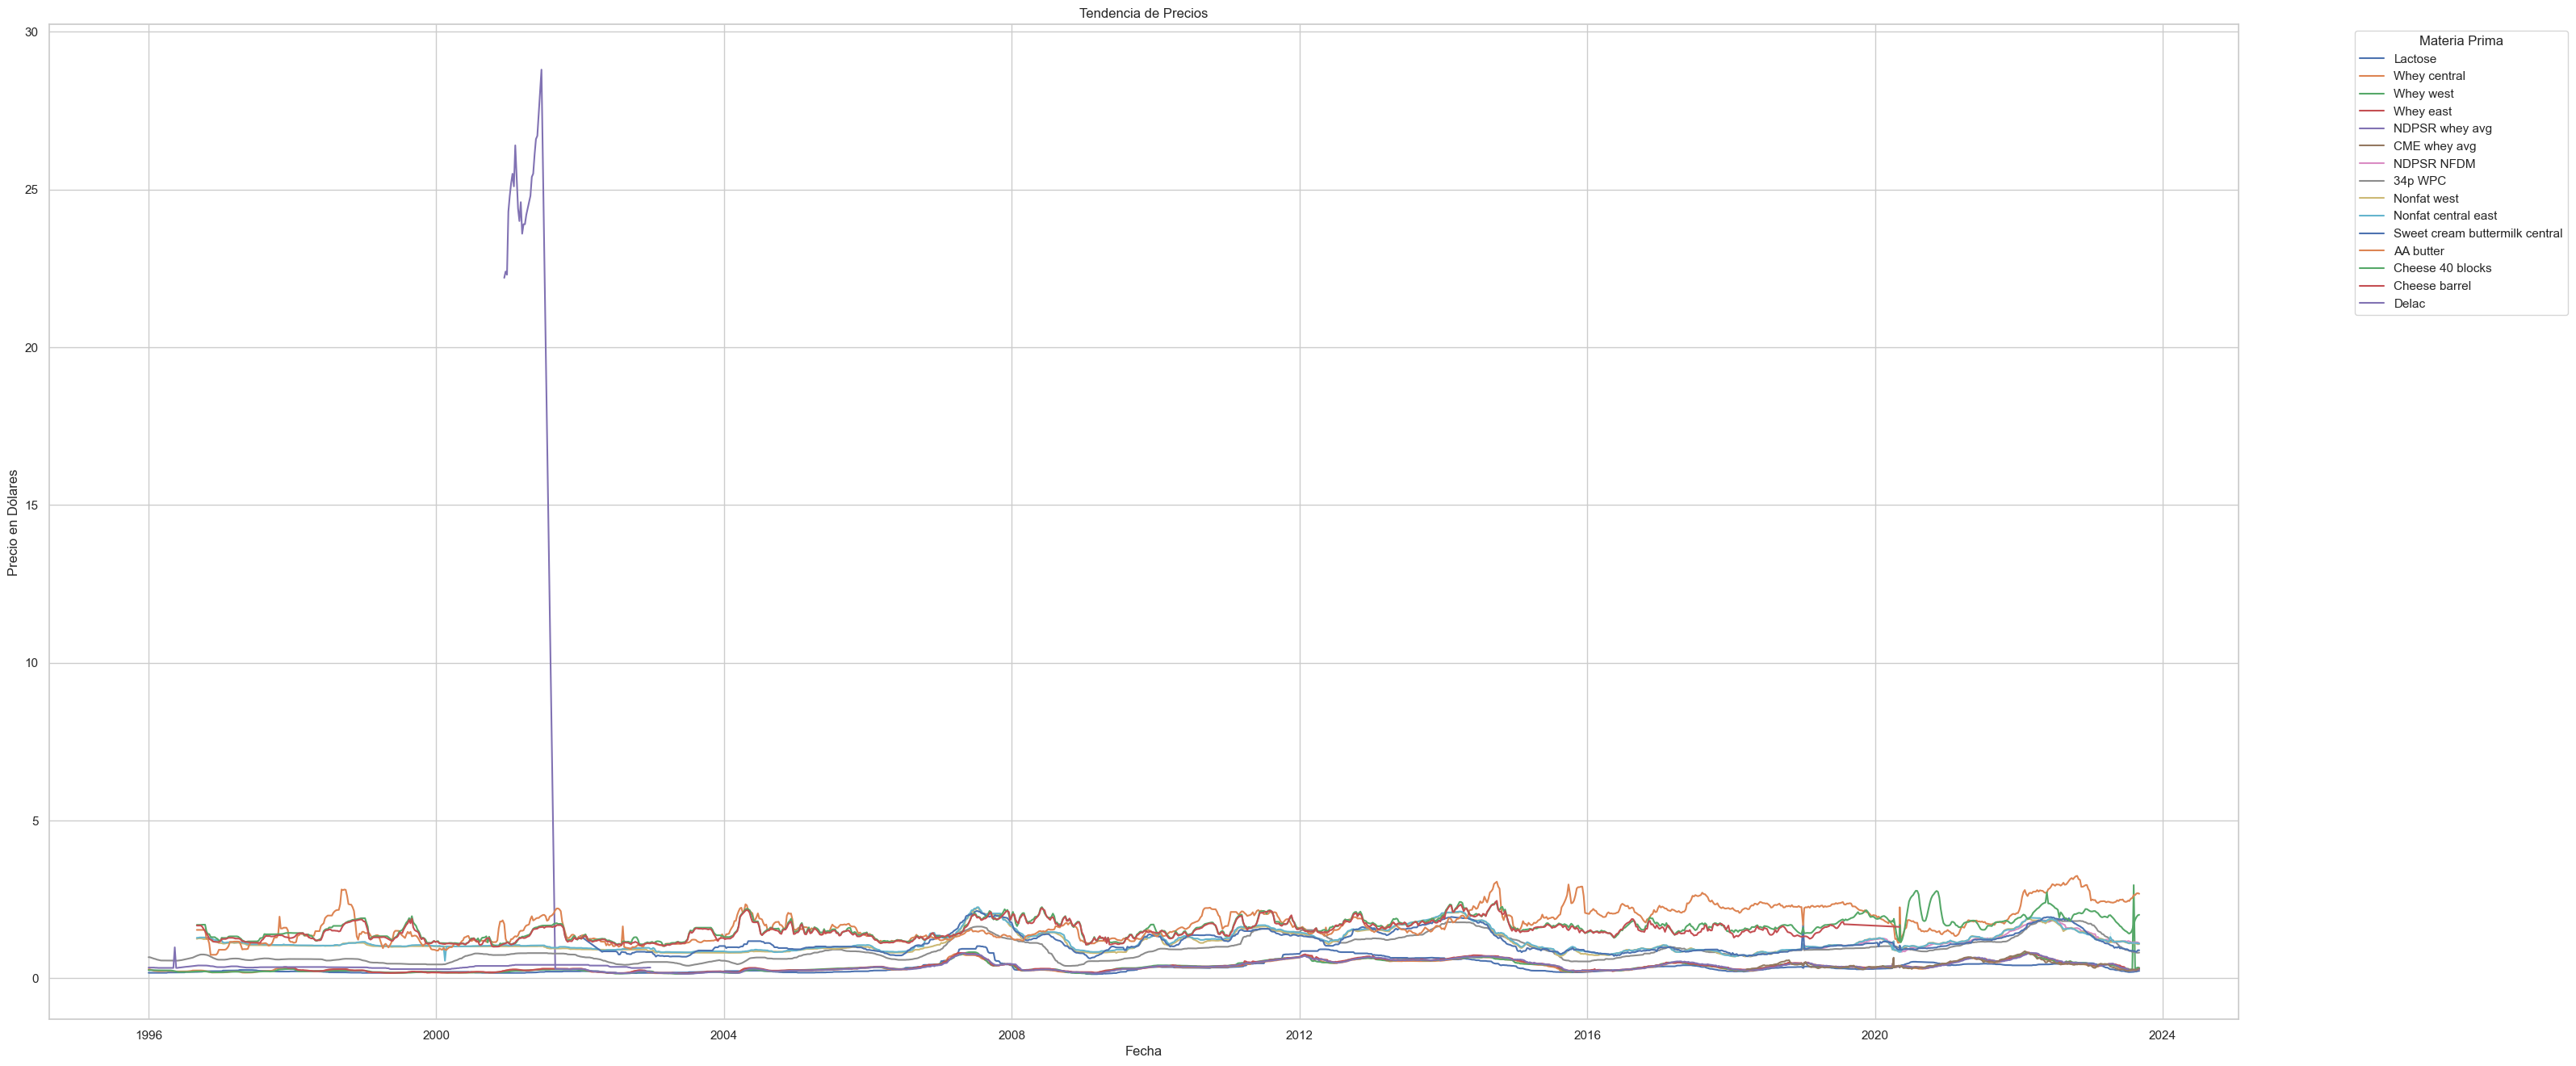

In [38]:
# Graficar tendencias
# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Graficar la tendencia de precios para cada columna
plt.figure(figsize=(35, 16))
sns.lineplot(x='Start_interval', y='Lactose', data=df_all_years, label='Lactose')
sns.lineplot(x='Start_interval', y='Whey central', data=df_all_years, label='Whey central')
sns.lineplot(x='Start_interval', y='Whey west', data=df_all_years, label='Whey west')
sns.lineplot(x='Start_interval', y='Whey east', data=df_all_years, label='Whey east')
sns.lineplot(x='Start_interval', y='NDPSR whey avg', data=df_all_years, label='NDPSR whey avg')
sns.lineplot(x='Start_interval', y='CME whey avg', data=df_all_years, label='CME whey avg')
sns.lineplot(x='Start_interval', y='NDPSR NFDM', data=df_all_years, label='NDPSR NFDM')
sns.lineplot(x='Start_interval', y='34p WPC', data=df_all_years, label='34p WPC')
sns.lineplot(x='Start_interval', y='Nonfat west', data=df_all_years, label='Nonfat west')
sns.lineplot(x='Start_interval', y='Nonfat central east', data=df_all_years, label='Nonfat central east')
sns.lineplot(x='Start_interval', y='Sweet cream buttermilk central', data=df_all_years, label='Sweet cream buttermilk central')
sns.lineplot(x='Start_interval', y='AA butter', data=df_all_years, label='AA butter')
sns.lineplot(x='Start_interval', y='Cheese 40 blocks', data=df_all_years, label='Cheese 40 blocks')
sns.lineplot(x='Start_interval', y='Cheese barrel', data=df_all_years, label='Cheese barrel')
sns.lineplot(x='Start_interval', y='Delac', data=df_all_years, label='Delac')

# Leyendas de ejes
plt.title('Tendencia de Precios')
plt.xlabel('Fecha')
plt.ylabel('Precio en Dólares')
plt.legend(title='Materia Prima', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

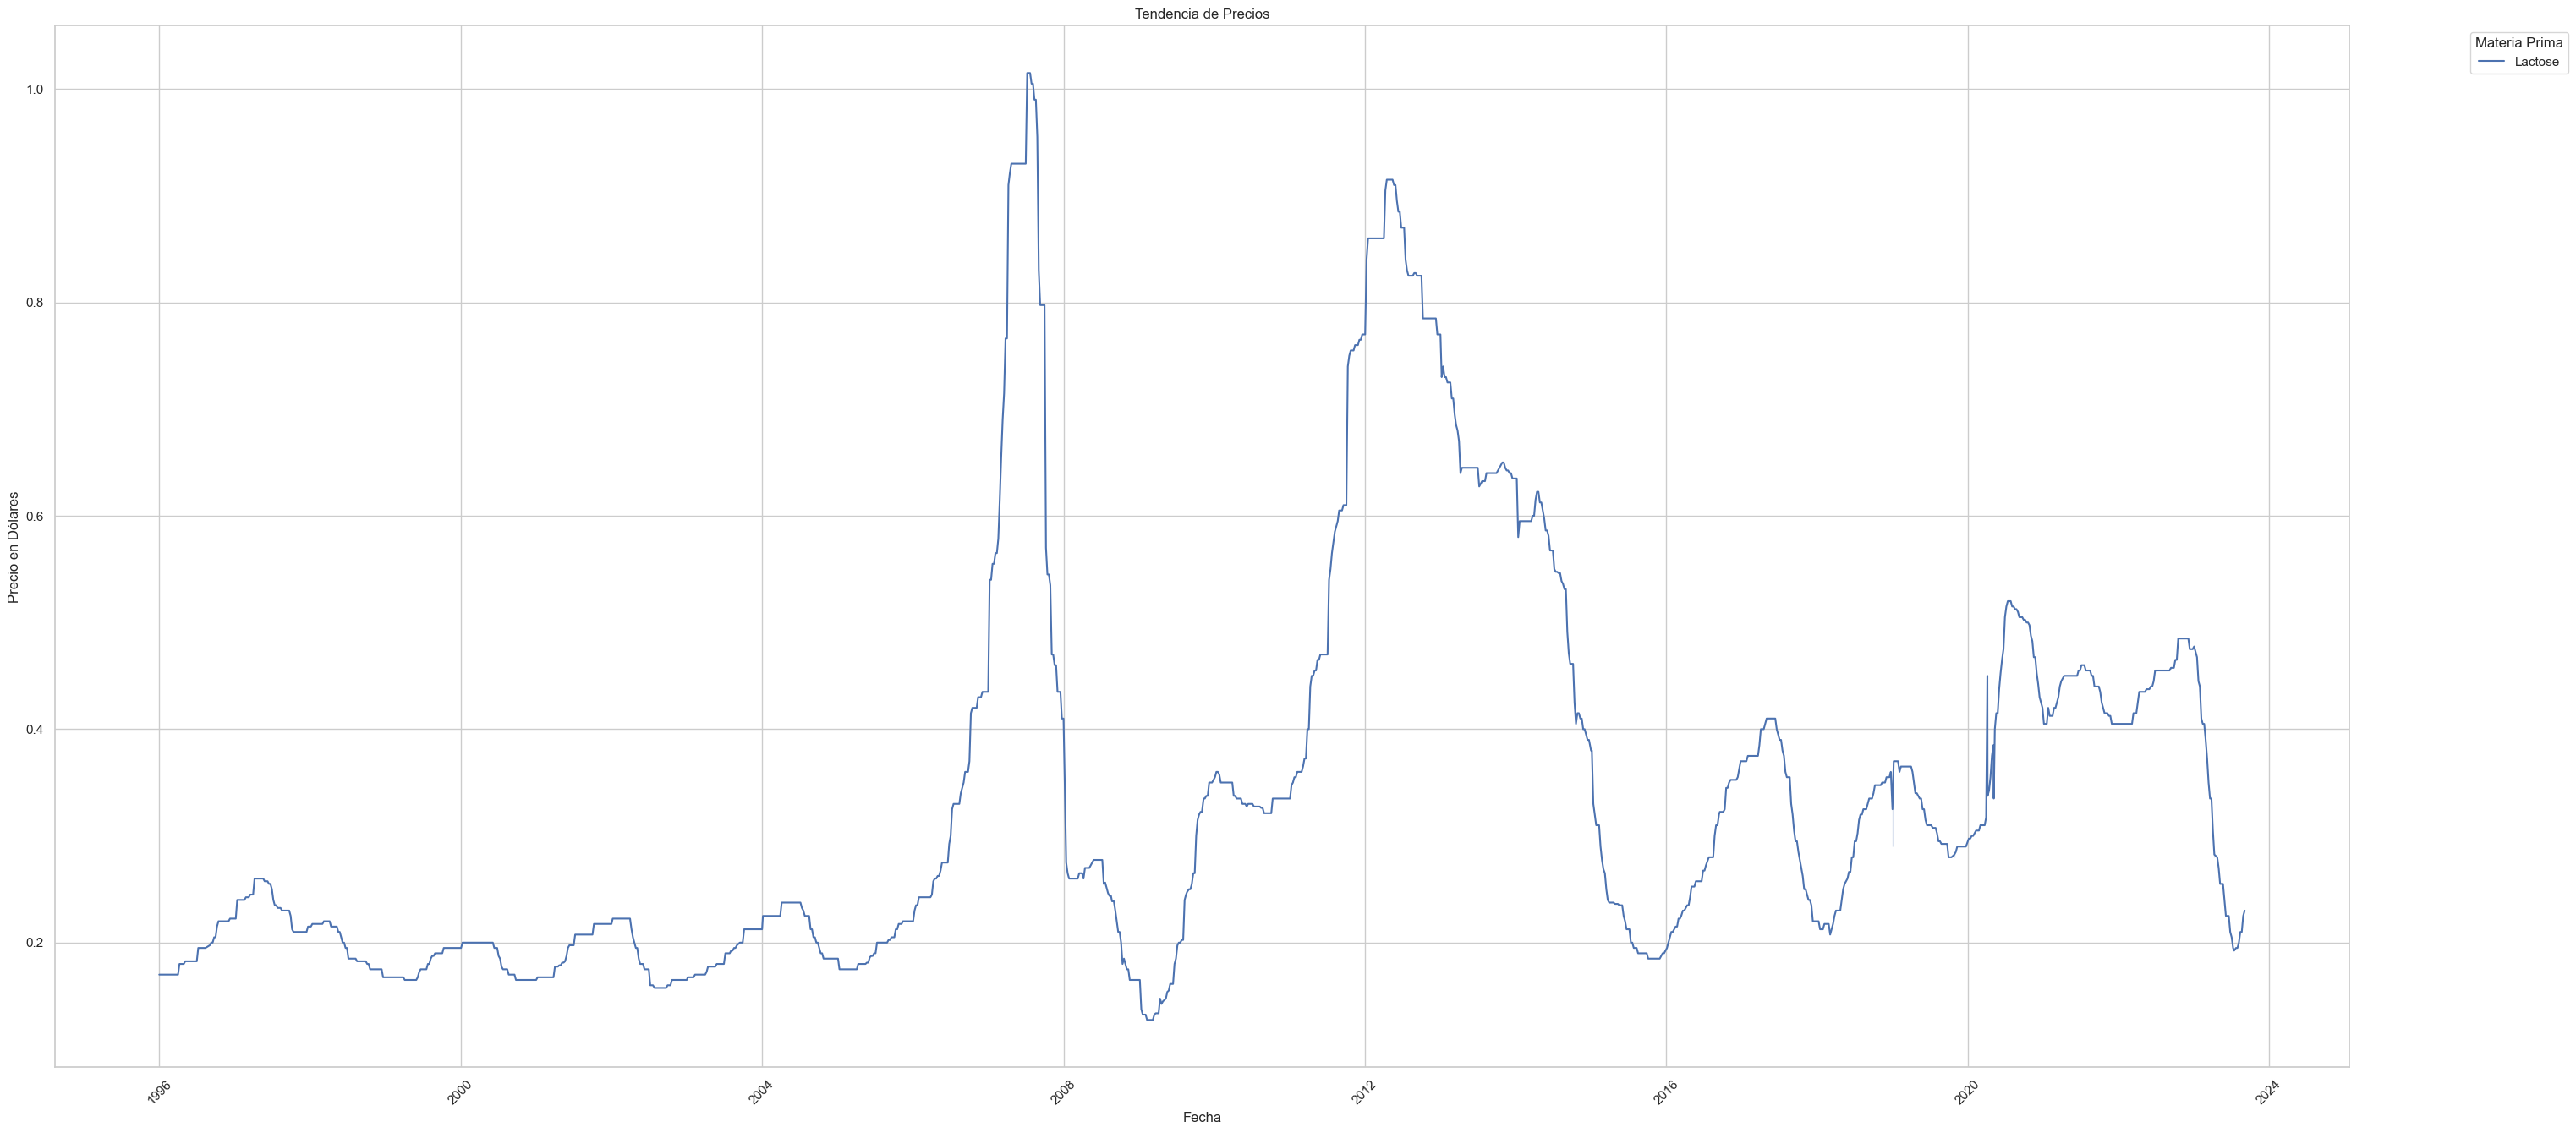

In [39]:
# Graficar tendencias
# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Graficar la tendencia de precios para cada columna
plt.figure(figsize=(35, 16))
sns.lineplot(x='Start_interval', y='Lactose', data=df_all_years, label='Lactose')

# Leyendas de ejes
plt.title('Tendencia de Precios')
plt.xlabel('Fecha')
plt.ylabel('Precio en Dólares')
plt.legend(title='Materia Prima', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [52]:
cols_by_week = ['Start_interval', 'Year', 'Month', 'Week year', 'Lactose', 'Whey central', 'Whey west', 'Whey east',
                  'NDPSR whey avg', 'CME whey avg', 'NDPSR NFDM', '34p WPC','Nonfat west', 'Nonfat central east', 
                  'Sweet cream buttermilk central', 'AA butter', 'Cheese 40 blocks', 'Cheese barrel', 'Delac']

df_all_by_week = df_all[cols_by_week]
df_all_by_week['Year'] = df_all_by_week['Year'].astype('int')
df_all_by_week['Week year'] = df_all_by_week['Week year'].astype('int')

# Guardar dataset basado en start inteval
#df_all_by_week.to_csv('DMN Report 29 - Preprocess by week.csv', index=False)

df_all_by_week

C:\Users\danie\AppData\Local\Temp\ipykernel_34776\3573421895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_by_week['Year'] = df_all_by_week['Year'].astype('int')
C:\Users\danie\AppData\Local\Temp\ipykernel_34776\3573421895.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_by_week['Week year'] = df_all_by_week['Week year'].astype('int')


,Start_interval,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,2023,1,1,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,2023,1,2,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,2023,1,3,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,2023,1,4,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,2023,1,5,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,1996,11,48,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,1996,12,49,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,1996,12,50,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,1996,12,51,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [41]:
#df_all_by_week.fillna(0, inplace=True)
#df_all_by_week

In [53]:
df_all_by_week.describe()

,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
count,1440.000000,1440.000000,1440.000000,1437.000000,1437.000000,1437.000000,1341.000000,1155.000000,284.000000,242.000000,1437.000000,1404.000000,1404.000000,1109.000000,1401.000000,1401.000000,1188.000000,363.000000
mean,2009.337500,6.371528,26.315972,0.336766,0.352228,0.360878,0.380433,0.906638,0.443147,1.254077,0.900317,1.134225,1.162195,1.150331,1.710473,1.602492,1.499122,0.357811
std,8.007292,3.434509,15.000422,0.189034,0.155367,0.174252,0.163269,3.497731,0.133350,0.268975,0.368705,0.325392,0.326585,0.348552,0.507677,0.323600,0.286058,0.052445
min,1996.000000,1.000000,1.000000,0.127500,0.135000,0.135000,0.152500,0.136300,0.234000,0.838700,0.387500,0.685000,0.552812,0.625000,0.740000,1.008000,0.997500,0.287500
25%,2002.000000,3.000000,13.000000,0.200000,0.230000,0.227500,0.253750,0.269450,0.341875,1.051250,0.605000,0.902500,0.919687,0.885000,1.305000,1.352000,1.280000,0.328750
50%,2009.000000,6.000000,26.000000,0.260000,0.310000,0.322500,0.346250,0.371600,0.418900,1.171200,0.812500,1.025000,1.044687,1.025000,1.607500,1.598500,1.476750,0.350000
75%,2016.000000,9.000000,39.000000,0.415000,0.450000,0.465000,0.493750,0.541100,0.520125,1.426300,1.127500,1.271250,1.316250,1.360000,2.087500,1.800000,1.675875,0.387500
max,2023.000000,12.000000,53.000000,1.015000,0.805000,2.950000,0.811250,28.800000,0.855000,1.842300,1.832500,2.240000,2.248750,2.252300,3.242200,2.772300,2.452000,0.977500


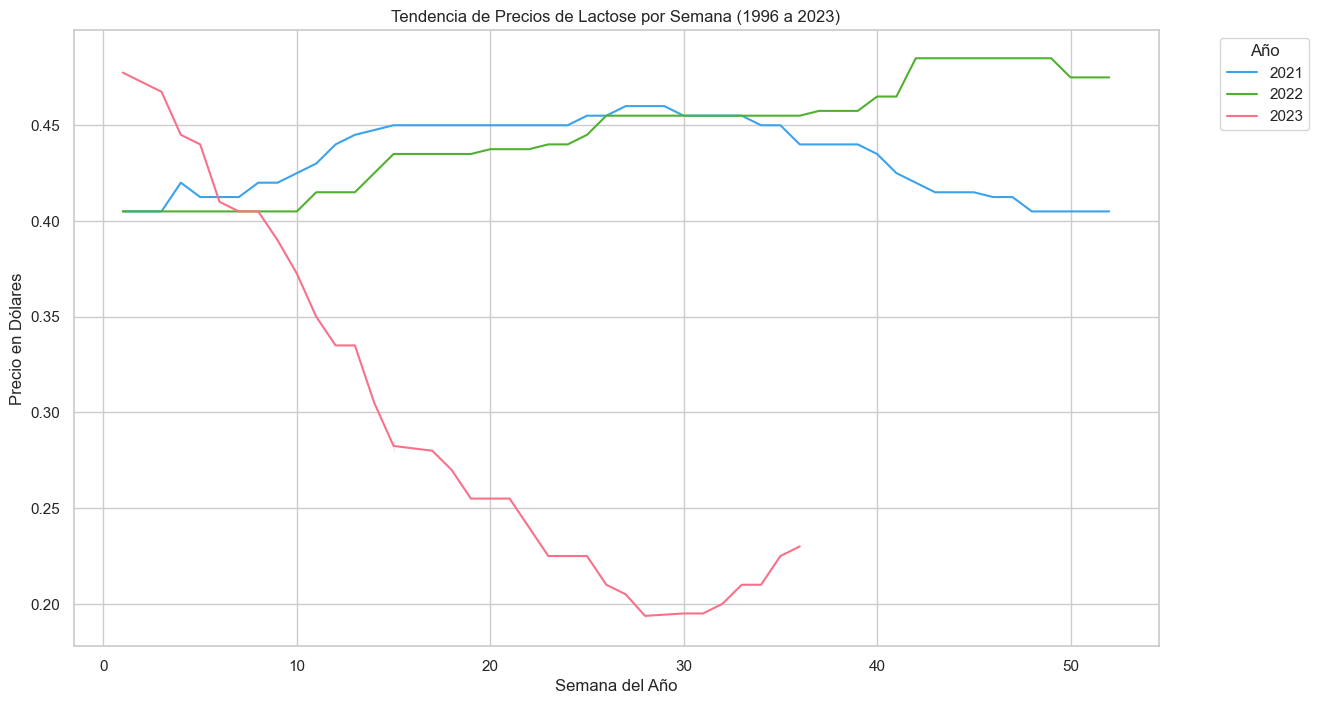

In [54]:
# Configuración del estilo de seaborn
sns.set(style="whitegrid")

# Materia prima a graficar
columna_materia_prima = 'Lactose'

# Filtrar el DataFrame para la materia prima y años deseados
df_filtered = df_all_by_week[df_all_by_week['Year'].between(2021, 2023)]

# Crear una paleta de colores única para cada año
colores_por_año = sns.color_palette("husl", n_colors=len(df_filtered['Year'].unique()))

# Graficar la tendencia de precios para la materia prima seleccionada
plt.figure(figsize=(14, 8))
sns.lineplot(x='Week year', y=columna_materia_prima, hue='Year', data=df_filtered,
             palette=dict(zip(df_filtered['Year'].unique(), colores_por_año)), markers=True)

# Configuraciones adicionales del gráfico
plt.title(f'Tendencia de Precios de {columna_materia_prima} por Semana (1996 a 2023)')
plt.xlabel('Semana del Año')
plt.ylabel('Precio en Dólares')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [55]:
# Valores faltantes
nan_count_1 = df_all_by_week.isna().sum()
nan_count_1 = pd.DataFrame(nan_count_1.items(), columns=['Atributo', 'NaN']).T
nan_count_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Atributo,Start_interval,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
NaN,0,0,0,0,3,3,3,99,285,1156,1198,3,36,36,331,39,39,252,1077


In [56]:
df_imput = df_all_by_week.copy()
df_imput

,Start_interval,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,2023,1,1,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,2023,1,2,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,2023,1,3,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,2023,1,4,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,2023,1,5,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,1996,11,48,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,1996,12,49,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,1996,12,50,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,1996,12,51,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [57]:
# Imputación de media por clase ('Year', 'Month') usando una función lambda
for column in df_imput.columns[4:]:
    df_imput[column] = df_imput.groupby(['Year', 'Month'])[column].transform(lambda x: x.fillna(x.mean()))
    
df_imput

,Start_interval,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
0,2023-01-02,2023,1,1,0.4775,0.4100,0.4350,0.42750,0.4371,0.4088,1.4326,1.7275,1.4000,1.3800,1.350,2.4625,2.1151,NaN,NaN
1,2023-01-09,2023,1,2,0.4725,0.4025,0.4350,0.42625,0.4430,0.3575,1.4074,1.6775,1.3600,1.3025,1.335,2.4936,2.1145,NaN,NaN
2,2023-01-16,2023,1,3,0.4675,0.3725,0.4150,0.42500,0.4453,0.3300,1.3974,1.6775,1.3300,1.2850,1.300,2.4732,2.1274,NaN,NaN
3,2023-01-23,2023,1,4,0.4450,0.3600,0.4050,0.41125,0.4259,0.3245,1.3981,1.6250,1.2800,1.2300,1.250,2.4773,2.1269,NaN,NaN
4,2023-01-30,2023,1,5,0.4400,0.3600,0.3850,0.39500,0.4001,0.3620,1.2786,1.5750,1.2150,1.2200,1.225,2.4085,2.0891,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1996-11-25,1996,11,48,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6375,1.1600,1.2250,NaN,0.7425,1.3000,1.1575,0.375
1436,1996-12-02,1996,12,49,0.2200,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6225,1.1550,1.2125,NaN,0.7425,1.3000,1.1525,0.365
1437,1996-12-09,1996,12,50,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.6025,1.1525,1.2075,NaN,0.7425,1.2675,1.1500,0.355
1438,1996-12-16,1996,12,51,0.2225,0.1800,0.1850,NaN,NaN,NaN,NaN,0.5900,1.1400,1.2000,NaN,0.7900,1.2425,1.1475,0.350


In [58]:
# Valores faltantes
nan_count_2 = df_imput.isna().sum()
nan_count_2 = pd.DataFrame(nan_count_2.items(), columns=['Atributo', 'NaN']).T
nan_count_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Atributo,Start_interval,Year,Month,Week year,Lactose,Whey central,Whey west,Whey east,NDPSR whey avg,CME whey avg,NDPSR NFDM,34p WPC,Nonfat west,Nonfat central east,Sweet cream buttermilk central,AA butter,Cheese 40 blocks,Cheese barrel,Delac
NaN,0,0,0,0,0,0,0,96,262,1152,1195,0,35,35,321,35,35,240,1075


# Modelo ARIMA propio

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [120]:
# Definición de parámetros
P = 2
Q = 2
TRAIN_SIZE = 0.8

In [167]:
raw_data = df_imput[['Start_interval', 'Lactose']].copy()
raw_data.columns = ['date', 'value']
raw_data.drop_duplicates(subset='date')
raw_data

,Start_interval,Lactose,Whey central,Whey west
0,2023-01-02,0.470443,0.4100,0.4350
1,2023-01-09,0.465517,0.4025,0.4350
2,2023-01-16,0.460591,0.3725,0.4150
3,2023-01-23,0.438424,0.3600,0.4050
4,2023-01-30,0.433498,0.3600,0.3850
...,...,...,...,...
1435,1996-11-25,0.216749,0.1800,0.1850
1436,1996-12-02,0.216749,0.1800,0.1850
1437,1996-12-09,0.219212,0.1800,0.1850
1438,1996-12-16,0.219212,0.1800,0.1850


In [168]:
# Observaciones por atributo
df_cols = ['date', 'value']
obs_vals = {col: raw_data[col].nunique() for col in df_cols}
obs_df = (pd.DataFrame(obs_vals.items(), columns=['Atributo', 'Obs'])).T
obs_df

,0,1,2,3
Atributo,Start_interval,Lactose,Whey central,Whey west
Obs,1436,225,335,396


In [169]:
#raw_data.to_csv("arima_data.csv")

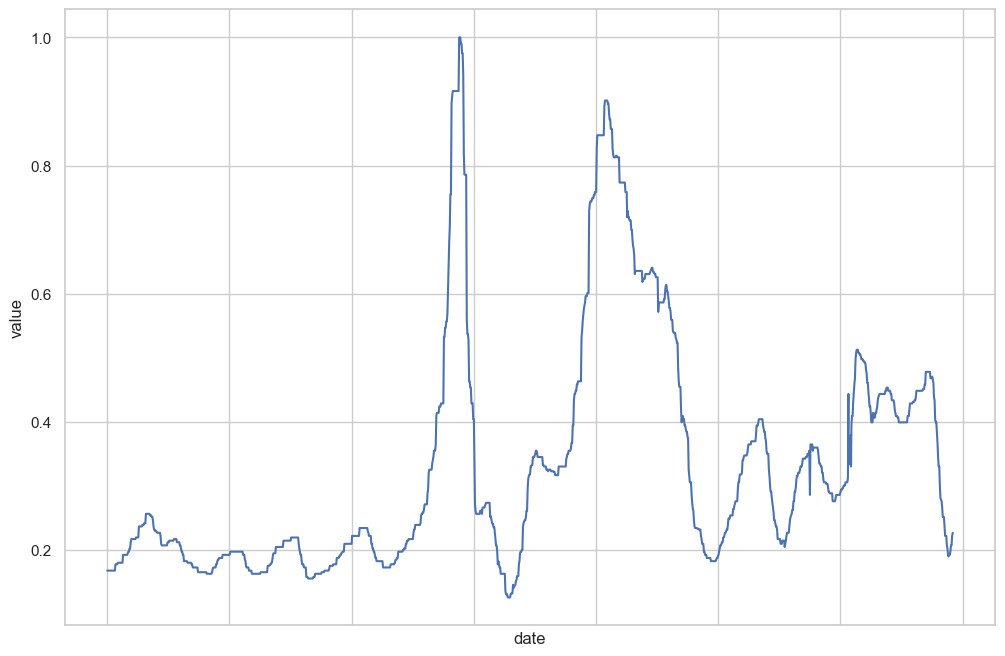

In [141]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=raw_data, x='date', y='value', ax=ax)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=15)
plt.show()

In [142]:
raw_data.set_index('date', inplace=True)
raw_data.dropna(inplace=True)
raw_data

,value
date,
2023-01-02,0.470443
2023-01-09,0.465517
2023-01-16,0.460591
2023-01-23,0.438424
2023-01-30,0.433498
...,...
1996-11-25,0.216749
1996-12-02,0.216749
1996-12-09,0.219212


In [143]:
class ARIMA(object):
    def __init__(self):
        pass
    
    @staticmethod
    def _regressor(df, n, val_col, out_pred_col, train_size=0.8):
        _df = df.copy()

        # Generar n terminos rezagados (lagged)
        for i in range(1, n + 1):
            _df[f'shifted_values_{i}'] = _df[val_col].shift(i)
        _df.dropna(inplace=True)


        _train_size = int(train_size * _df.shape[0])

        #División en test y train set
        _df_train = pd.DataFrame(_df[:_train_size])
        _df_test = pd.DataFrame(_df[_train_size:])

        #X contiene los terminos rezagados, por lo que se ignora la primer columna
        X_train = _df_train.iloc[:, 1:].values.reshape(-1, n)
        #Y contains the value, it is the first column
        y_train = _df_train.iloc[:, 0].values.reshape(-1, 1)
        
        # We do the same thing with the test set
        X_test = _df_test.iloc[:, 1:].values.reshape(-1, n)
        y_test = _df_test.iloc[:, 0].values.reshape(-1, 1)

        # Regresión lineal para generar los coeficientes de los terminos rezagados
        lr = LinearRegression()
        lr.fit(X_train, y_train)

        theta  = lr.coef_.T
        intercept = lr.intercept_
        _df_train[out_pred_col] = X_train.dot(theta) + intercept
#         _df_train[[val_col, out_pred_col]].plot()

        _df_test[out_pred_col] = X_test.dot(theta) + intercept
#         _df_test[[val_col, out_pred_col]].plot()

        rmse = np.sqrt(mean_squared_error(y_test, _df_test[out_pred_col]))

#         print(f'RMSE = {rmse}. Valor de n = {n}')
        new_df = pd.concat([_df_train, _df_test])[[val_col, out_pred_col]]
        return new_df, theta, intercept, rmse, np.abs(_df_test[out_pred_col].mean())
    
    @staticmethod
    def AR(df, p, val_col='value', out_pred_col='predicted_value', train_size=0.8):
        return ARIMA._regressor(df, p, val_col, out_pred_col, train_size)
    
    @staticmethod
    def I(df, val_col='value', fn=None):
        _df = df.copy()
        if fn is not None:
            return pd.DataFrame(fn(_df[val_col])).dropna()
        return _df

    @staticmethod
    def MA(df, q, val_col='value', in_pred_col='predicted_value', out_pred_col='ma_predicted_value', train_size=0.8):
        _df = df.copy()
        _df['residual'] = _df[val_col] - _df[in_pred_col]
        return ARIMA._regressor(_df[['residual']], q, 'residual', out_pred_col, train_size)
    
    
    def fit(self, df, p, q, val_col, train_size, stationary_fn=None):
        _df = df.copy()
        stationary_df = ARIMA.I(_df, val_col, stationary_fn)
#         stationary_df[val_col].plot()
#         plt.show()
        
        ar_out_df, ar_theta, ar_intercept, ar_rmse, ar_mean_pred = ARIMA.AR(stationary_df, p, val_col, 'ar_predicted_value', train_size)
#         print(ar_rmse)
#         ar_out_df['ar_predicted_value'].plot()
#         plt.show()
        
        ma_out_df, ma_theta, ma_intercept, ma_rmse, ma_mean_pred = ARIMA.MA(ar_out_df, q, val_col, 'ar_predicted_value', 'ma_predicted_value', train_size)
#         print(ma_rmse)
#         ma_out_df['ma_predicted_value'].plot()
#         plt.show()
        
#         final_predictions = (ar_out_df['ar_predicted_value'] + ma_out_df['ma_predicted_value']).dropna()
#         final_predictions.plot()
        
#         Predicciones
        stationary_df['prediction'] = ar_out_df['ar_predicted_value'] + ma_out_df['ma_predicted_value']
        return stationary_df.dropna(), ar_theta, ar_intercept, ma_theta, ma_intercept, ar_rmse, ma_rmse, ar_mean_pred, ma_mean_pred

In [144]:
arima_model = ARIMA()

In [145]:
stationary_fn = lambda x: x.diff().diff()

def reverse_stationary_fn(ori_x, new_x):
    x = new_x.copy()
    x += ori_x.shift(1)
    x += ori_x.diff().shift(1)
    return x

# stationary_fn = lambda x: np.log(x).diff()
# def reverse_stationary_fn(ori_x, new_x):
#     x = new_x.copy()
#     x += np.log(ori_x).shift(1)
#     return np.exp(x)

# stationary_fn = lambda x: np.log(x).diff().diff()
# def reverse_stationary_fn(ori_x, new_x):
#     x = new_x.copy()
#     x += np.log(ori_x).shift(1)
#     x += np.log(ori_x).diff().shift(1)
#     return np.exp(x)

min_ar_rmse = float('inf')
min_ma_rmse = float('inf')
best_ar_mean_pred = None
best_ma_mean_pred = None
best_p = 1
best_q = 1

for i in range(1, 21):
    final_predictions, \
        ar_theta, ar_intercept, \
        ma_theta, ma_intercept, \
        ar_rmse, ma_rmse, \
        ar_mean_pred, ma_mean_pred = arima_model.fit(raw_data, i, best_q, 'value', TRAIN_SIZE, stationary_fn)

    if ar_rmse < min_ar_rmse:
        min_ar_rmse = ar_rmse
        best_ar_mean_pred = ar_mean_pred
        best_p = i

            
for j in range(1, 21):
    final_predictions, \
        ar_theta, ar_intercept, \
        ma_theta, ma_intercept, \
        ar_rmse, ma_rmse, \
        ar_mean_pred, ma_mean_pred = arima_model.fit(raw_data, best_p, j, 'value', TRAIN_SIZE, stationary_fn)

    if ma_rmse < min_ma_rmse:
        min_ma_rmse = ma_rmse
        best_ma_mean_pred = ma_mean_pred
        best_q = j

In [146]:
print(f'Min RMSE of AR model: {min_ar_rmse} (relative err: {min_ar_rmse/best_ar_mean_pred}). Best P: {best_p}')
print(f'Min RMSE of MA model: {min_ma_rmse} (relative err: {min_ma_rmse/best_ma_mean_pred}). Best Q: {best_q}')

Min RMSE of AR model: 0.005361038580269602 (relative err: 42.4785049737587). Best P: 13
Min RMSE of MA model: 0.005353317813826189 (relative err: 194.1299677519761). Best Q: 10


In [164]:
final_predictions, \
    ar_theta, ar_intercept, \
    ma_theta, ma_intercept, \
    ar_rmse, ma_rmse, \
    ar_mean_pred, ma_mean_pred = arima_model.fit(raw_data, 13, 10, 'value', TRAIN_SIZE, stationary_fn)

<AxesSubplot: xlabel='date'>

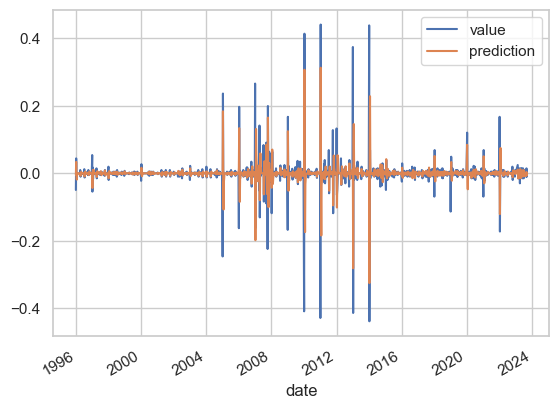

In [165]:
final_predictions.plot()

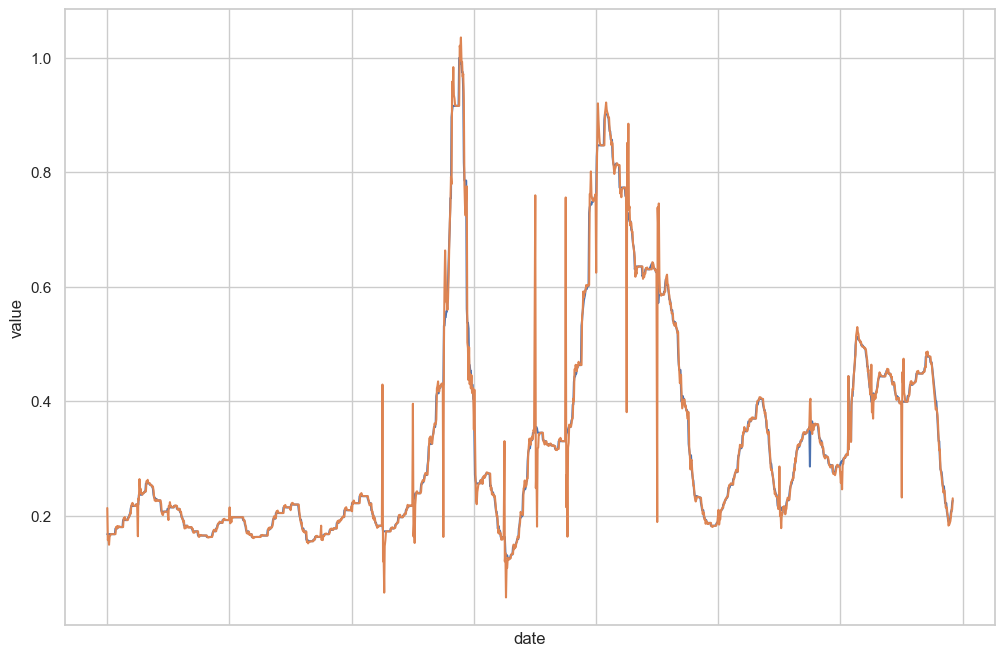

In [166]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=pd.DataFrame(reverse_stationary_fn(raw_data['value'], final_predictions['value'])).reset_index(), x='date', y='value', ax=ax)
sns.lineplot(data=pd.DataFrame(reverse_stationary_fn(raw_data['value'], final_predictions['prediction'])).reset_index(), x='date', y='prediction', ax=ax)
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=15)
plt.show()